<a href="https://colab.research.google.com/github/gitakartika/customer-segmentation-analysis-product-recommender-system/blob/master/Market_Analysis_Data_Mining_Project_Group_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade umap-learn

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.6/dist-packages (0.4.6)


# *Import package*

*Package* dibawah ini merupakan *package* yang digunakan untuk mengaplikasikan *Exploratory Data Analysis* dan *Clustering* pada data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn import preprocessing

# *Exploratory Data Analysis*


---



# I. *Import Data*

Pada *project* ini digunakan dataset dari *e-commerce* Olist pada Brasil. Dataset yang digunakan merupakan dataset *order*, *customer*, dan produk. Pertama, di *load* terlebih dahulu dataset *order*. 

In [ ]:
order=pd.read_csv('/content/drive/My Drive/Data Mining/olist_orders_dataset.csv') #dataset disimpan dalam variabel "order"
order.head() #kita ingin melihat 5 data teratas dari order

order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4  ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00

[5 rows x 8 columns]

Terlihat bahwa, *order* merupakan suatu dataset yang memuat kumpulan pesanan atau pembelian pada Olist. Selanjutnya, di *load* dataset *customer*.

In [ ]:
cust=pd.read_csv('/content/drive/My Drive/Data Mining/olist_customers_dataset.csv') #dataset disimpan dalam variabel "cust"
cust.head() #kita ingin melihat 5 data teratas dari cust

customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP
3  b2b6027bc5c5109e529d4dc6358b12c3  ...             SP
4  4f2d8ab171c80ec8364f7c12e35b23ad  ...             SP

[5 rows x 5 columns]

Dataset *customer* memuat informasi mengenai *customer* dari Olist. Selanjutnya, di *load* dataset produk.

In [ ]:
prod=pd.read_csv('/content/drive/My Drive/Data Mining/olist_order_items_dataset.csv') #dataset disimpan dalam variabel "prod"
prod.head() ##kita ingin melihat 5 data teratas dari prod

order_id  order_item_id  ...   price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.90         13.29
1  00018f77f2f0320c557190d7a144bdd3              1  ...  239.90         19.93
2  000229ec398224ef6ca0657da4fc703e              1  ...  199.00         17.87
3  00024acbcdf0a6daa1e931b038114c75              1  ...   12.99         12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9              1  ...  199.90         18.14

[5 rows x 7 columns]

Dataset produk merupakan kumpulan produk yang dibeli oleh *customer*. Selanjutnya, ketiga buah data yang telah di-*load* ini kemudian melalui tahap *pre-processing*, sehingga bisa memberikan insight yang valid dan bermanfaat bagi *client* Olist.

# II. *Pre-Processing*

Langkah pertama pada pemrosesan ini merupakan *Join Data*. Untuk memudahkan analisis, data digabungkan terlebih dahulu jadi sebuah dataset. 

## 1. *Join Data*

Langkah ini diawali dengan menganalisis terlebih dahulu variabel yang dimuat pada masing-masing dataset. 

In [ ]:
order.info() #untuk memberikan informasi dari data seperti tipe data untuk setiap variabel kategorik maupun numerik dari order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Pada dataset *order* terdapat tujuh buah variabel, yang memiliki peran sebagai berikut:


1.   order_id: nomor id setiap pemesanan
2.   customer_id: nomor id setiap pelanggan
3.   order_status: status pemesanan, seperti 'delivered'
4.   order_purchase_timestamp: waktu pembayaran pesanan
5. order_delivered_carrier_date: waktu jasa pengiriman telah mengirim barang
6. order_delivered_customer_date: waktu pesanan telah sampai diterima oleh pembeli



In [ ]:
cust.info() #untuk memberikan informasi dari data seperti tipe data untuk setiap variabel kategorik maupun numerik dari cust

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Pada dataset *customer* terdapat lima buah variabel, yang memiliki peran sebagai berikut:


1.   customer_id: nomor id setiap pelanggan
2.   customer_unique_id: nomor id setiap pelanggan yang unik
3.   customer_zip_code_prefix: tiga digit pertama dari alamat kode pos pelanggan
4.   customer_city: kota alamat pelanggan
5. customer_state: negara bagian alamat pelanggan

In [ ]:
prod.info() #untuk memberikan informasi dari data seperti tipe data untuk setiap variabel kategorik maupun numerik dari prod

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Pada dataset *product* terdapat tujuh buah variabel, yang memiliki peran sebagai berikut:


1.   order_id: nomor id setiap pesanan
2.   order_item_id: nomor id setiap barang dalam satu pesanan
3.   product_id: nomor id setiap produk
4.   seller_id: nomor id setiap penjual
5. shipping_limit_date: limit waktu sampai pengiriman pesanan
6. price : total harga pesanan untuk setiap order
7. freight_value: harga pengiriman barang untuk setiap pemesanan

Berdasrkan variabel yang dimuat pada dataset. Oleh karena itu, untuk menggabungkan dataset *order* dengan *customer* digunakan variabel *customer_id*.

In [ ]:
order_cust = pd.merge(order,cust,on='customer_id',how='left') #kita lakukan left join antara data order dan cust berdasarkan "customer_id"
order_cust.head() #melihat 5 data teratas dari order_cust 

order_id  ... customer_state
0  e481f51cbdc54678b7cc49136f2d6af7  ...             SP
1  53cdb2fc8bc7dce0b6741e2150273451  ...             BA
2  47770eb9100c2d0c44946d9cf07ec65d  ...             GO
3  949d5b44dbf5de918fe9c16f97b45f8a  ...             RN
4  ad21c59c0840e6cb83a9ceb5573f8159  ...             SP

[5 rows x 12 columns]

Di sisi lain, untuk menggabungkan dataset *order* dengan produk digunakan *order_id*. 

In [ ]:
df = pd.merge(order_cust,prod, on='order_id',how="left") #kita lakukan left join pada ketiga buah data berdasarkan "order_id"
df.head() #melihat 5 data teratas dari data frame yang akan digunakan

order_id  ... freight_value
0  e481f51cbdc54678b7cc49136f2d6af7  ...          8.72
1  53cdb2fc8bc7dce0b6741e2150273451  ...         22.76
2  47770eb9100c2d0c44946d9cf07ec65d  ...         19.22
3  949d5b44dbf5de918fe9c16f97b45f8a  ...         27.20
4  ad21c59c0840e6cb83a9ceb5573f8159  ...          8.72

[5 rows x 18 columns]

Pada analisis variabel tersebut, terlihat bahwa tidak semua variabel berguna untuk analisis. Oleh karena itu, langkah selanjutnya yaitu untuk meng-*remove* variabel yang tidak berguna atau perannya *redundant* dengan variabel lain.

## 2. *Removing Variabel*

Pertama-tama, perlu ditentukan terlebih dahulu manakah variabel yang memang berguna pada analisis ini.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

Perhatikan bahwa, 
1. *customer_id* telah diwakilkan informasikan oleh *customer_unique_id*
2. Tidak terdapat dataset *seller* pada project ini. Oleh karena itu, *seller_id* tidak bisa memberikan informasi apapun.
3. *shipping_limit_date* tidak akan dianalisis lebih lanjut dalam project ini karena pada umumnya tenggat waktu (limit waktu) bersifat tetap dan bergantung pada tanggal pembayaran oleh pelanggan, sehingga insight yang dapat digali jga terbatas.
4. *customer_zip_code_prefix* kurang berguna disebabkan tidak adanya data *langtitude* dan *longitude*. Selain itu, informasi mengenai keberadaan *customer* sudah cukup diwakilkan oleh *customer_city* dan *customer_state*.

Oleh karena itu, keempat variabel tersebut dibuang.

In [ ]:
df = df.drop(['customer_id', 'seller_id','shipping_limit_date','customer_zip_code_prefix'], axis = 1) #karena 'customer_id', 'seller_id', 'shipping_limit_date','customer_zip_code_prefix' tidak akan digunakan maka akan dihapus saja

Di sisi lain, 'order_item_id' dan 'product_id' hanya memuat id. Meskipun demikian, kedua variabel ini tidak dapat dihilangkan meskipun tidak akan memberikan insight apapun. Hal tersebut disebabkan, *order_id* mengindikasikan pesanan produk id yang berbeda dan *product_id* mengindikasikan produk yang dibeli. Dengan menghapus kedua variabel ini, beberapa pesanan akan terkesan sama sehingga memunculkan duplikasi data. 

In [ ]:
df=df[df['order_status']=='delivered']
df.head()

order_id order_status  ...   price freight_value
0  e481f51cbdc54678b7cc49136f2d6af7    delivered  ...   29.99          8.72
1  53cdb2fc8bc7dce0b6741e2150273451    delivered  ...  118.70         22.76
2  47770eb9100c2d0c44946d9cf07ec65d    delivered  ...  159.90         19.22
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered  ...   45.00         27.20
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered  ...   19.90          8.72

[5 rows x 14 columns]

Selanjutnya kita akan mengambil hanya data yang memiliki order_status delivered. Hal ini karena asumsi bahwa jika order_statusnya bukan delivered maka transaksi dianggap batal atau masih dalam proses sehingga belum bisa dianggap sebagai keuntungan dari perusahaan. Oleh karena itu, variabel *order_status* sudah tidak berguna untuk analisis ini.

In [ ]:
df.drop(['order_status'], axis = 1,inplace=True) 



---
Langkah selanjutnya, yaitu mengtransformasi data berdasarkan tipe data yang sesuai.


## 3. *Data Transformation*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_purchase_timestamp       110197 non-null  object 
 2   order_approved_at              110182 non-null  object 
 3   order_delivered_carrier_date   110195 non-null  object 
 4   order_delivered_customer_date  110189 non-null  object 
 5   order_estimated_delivery_date  110197 non-null  object 
 6   customer_unique_id             110197 non-null  object 
 7   customer_city                  110197 non-null  object 
 8   customer_state                 110197 non-null  object 
 9   order_item_id                  110197 non-null  float64
 10  product_id                     110197 non-null  object 
 11  price                          110197 non-null  float64
 12  freight_value                 

Perhatikan bahwa untuk variabel nomor 2-7 seharusnya merupakan tipe data *datetime*. 

In [ ]:
#kolom 2 'order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date' akan diganti menjadi type date
df.iloc[:, 1:6] = df.iloc[:, 1:6].apply(pd.to_datetime, errors='coerce') #akan di ganti data type dari variabel nomor 2 hingga 6 jadi format date time

Selain itu, meskipun *order_item_id* merupakan suatu angka, namun angka tersebut hanyalah suatu kode. Oleh karena itu, *order_item_id* merupakan seharusnya merupakan tipe data *string*.

In [ ]:
#kolom 'order_item_id' dan juga akan diganti masing-masing menjadi string
df['order_item_id'] = df['order_item_id'].astype(str)

Kini tipe data yang digunakan pada analisis ini yaitu sebagai berikut.

In [ ]:
#pengecekan kembali tipe dari setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_purchase_timestamp       110197 non-null  datetime64[ns]
 2   order_approved_at              110182 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110195 non-null  datetime64[ns]
 4   order_delivered_customer_date  110189 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110197 non-null  datetime64[ns]
 6   customer_unique_id             110197 non-null  object        
 7   customer_city                  110197 non-null  object        
 8   customer_state                 110197 non-null  object        
 9   order_item_id                  110197 non-null  object        
 10  product_id                     110197 non-null  object        
 11  

In [ ]:
df.head()

order_id  ... freight_value
0  e481f51cbdc54678b7cc49136f2d6af7  ...          8.72
1  53cdb2fc8bc7dce0b6741e2150273451  ...         22.76
2  47770eb9100c2d0c44946d9cf07ec65d  ...         19.22
3  949d5b44dbf5de918fe9c16f97b45f8a  ...         27.20
4  ad21c59c0840e6cb83a9ceb5573f8159  ...          8.72

[5 rows x 13 columns]

##4. *Duplicate Removal*

Langkah selanjutnya, dicek apakah ada duplikasi data pada dataset ini.

In [ ]:
#pengecekan jumlah banyak baris yang sama (duplikat data)
df.duplicated().sum()

0

## 5. *Noise Detection*

Kemudian, dari dataset dilihat karakteristiknya dan dianalisis apakah ada data yang menunjukkan nilai yang diluar karakteristiknya. Hal tersebut dapat menunjukkan data tersebut merupakan *noise*.

In [ ]:
#melihat statistika deskriptif dari data untuk melihat noise (data-data yang tidak masuk akal)
df.describe()
#nilai min dari 'freight_value' ada yang 0, dicurigai kemungkinan adanya free ongkir, yang lainnya sepertinya juga masuk akal sehingga tidak ada noise

price  freight_value
count  110197.000000  110197.000000
mean      119.980563      19.948598
std       182.299446      15.698136
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.900000      16.260000
75%       134.170000      21.150000
max      6735.000000     409.680000

Ternyata, melalui analisis tersebut tidak terlihat adanya data yang menunjukkan karakteristik yang  'aneh' atau berbeda sendiri.

## 6. *Missing Value Detection*


Selanjutnya, dicek apakah ada data yang *missing* pada data.

In [ ]:
#pengecekan nilai yang hilang (missing value) pada data untuk setiap variabel numerik dan kategoriknya


order_id                          0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
price                             0
freight_value                     0
dtype: int64

Terlihat bahwa pada variabel *order_approved_at* memuat missing value menunjukkan bahwa suatu pembelian tidak di setujui oleh pihak Olist. Sedangkan, *missing value* pada *order_delivered_carrier_date* dan *order_delivered_customer_date* menunjukkan informasi tibanya produk yang tidak diinput pada dataset. 

In [ ]:
#persentasi missing data untuk setiap variabel kategorik dan numerik pada data
(df.isnull().sum()/len(df)).to_frame('persentase missing')

persentase missing
order_id                                 0.000000
order_purchase_timestamp                 0.000000
order_approved_at                        0.000136
order_delivered_carrier_date             0.000018
order_delivered_customer_date            0.000073
order_estimated_delivery_date            0.000000
customer_unique_id                       0.000000
customer_city                            0.000000
customer_state                           0.000000
order_item_id                            0.000000
product_id                               0.000000
price                                    0.000000
freight_value                            0.000000

Dapat terlihat bahwa persentase hilangnya data pada variabel tersebut sangat sedikit.

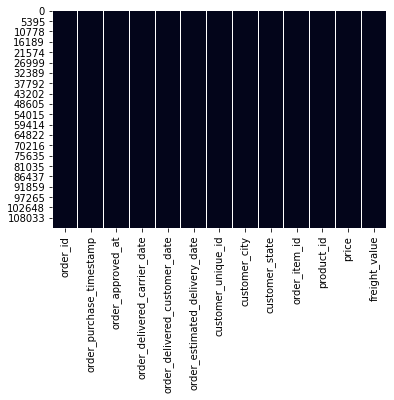

In [ ]:
#gambaran heat map dari missing value untuk melihat persebaran missing value
sns.heatmap(df.isnull(), cbar=False)

Persebaran *missing value* terkesan random, maka akan didrop missing value dengan ketentuan: jika ada minimal satu missing value di salah satu kolom, maka baris di hapus

In [ ]:
df.dropna(axis=0,how='any',inplace=True)

In [ ]:
#pengecekan kembali missing value pada data setelah di drop
df.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
dtype: int64

In [ ]:
#ukuran (baris,kolom) dari data yang telah siap untuk digunakan
df.shape

(110173, 13)

Berdasarkan pemrosesan tersebut, kini diperoleh data yang telah siap untuk dianalisis dengan 13 variabel dan 110173 baris.

## 7. *Data Visualization*

Pada bagian-bagian berikut, dianalisis beberapa aspek yang dapat menjadi informasi bagi Olist untuk meningkatkan pendapatannya.

### A. Jumlah Pembelian pada *E-Commerce*

#### a. Tren Jumlah Pembelian pada Tahun 2016 - 2018

In [ ]:
df['purchase_year'] = df['order_purchase_timestamp'].dt.strftime('%Y') #dari data waktu yang ada, hanya ingin di ambil tahunnya saja
df['purchase_month'] = df['order_purchase_timestamp'].dt.strftime('%b') #dari data waktu yang ada, hanya ingin di ambil bulannya saja
df['purchase_yearmonth'] = df['order_purchase_timestamp'].dt.strftime('%Y%m') #dari data waktu yang ada, hanya ingin di ambil tahun dan bulannya saja
df['purchase_dayofweek'] = df['order_purchase_timestamp'].dt.strftime('%a') #dari data waktu yang ada, hanya ingin di ambil harinya saja
df['purchase_period'] = (df['order_purchase_timestamp'].dt.hour % 24 + 4) // 4 
df['purchase_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True) #1 hari dibagi menjadi 6 periode waktu
df['month_num'] = df['purchase_month'].apply(lambda x: datetime.datetime.strptime(x, "%b").month) #nama bulan pada 'purchase_month' akan diubah menjadi angka

df.head()

order_id  ... month_num
0  e481f51cbdc54678b7cc49136f2d6af7  ...        10
1  53cdb2fc8bc7dce0b6741e2150273451  ...         7
2  47770eb9100c2d0c44946d9cf07ec65d  ...         8
3  949d5b44dbf5de918fe9c16f97b45f8a  ...        11
4  ad21c59c0840e6cb83a9ceb5573f8159  ...         2

[5 rows x 19 columns]

Text(0.5, 1.0, 'Tren Jumlah Pembelian dari Tahun 2017 hingga 2018')

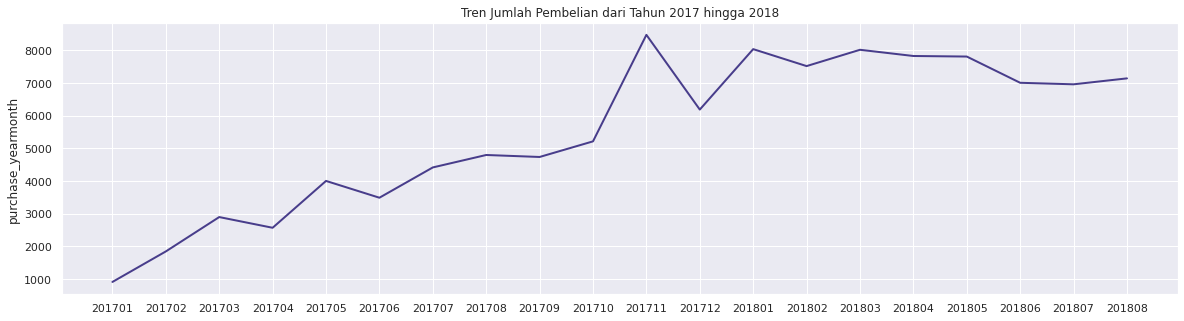

In [ ]:
#plot dari tren pembelian dari tahun 2016 hingga 2018 dengan menggunakan line plot
sns.set(rc={'figure.figsize':(20,5)}) #untuk ukuran plot
sns.lineplot(data=df['purchase_yearmonth'].value_counts().sort_index()[3:], 
             color='darkslateblue', linewidth=2)
plt.title('Tren Jumlah Pembelian dari Tahun 2017 hingga 2018') #judul dari plot

Dari *line plot* di atas dapat dilihat bahwa tren penjualan
terus meningkat meski sempat mengalami beberapa sedikit penurunan



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110173 entries, 0 to 113424
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110173 non-null  object        
 1   order_purchase_timestamp       110173 non-null  datetime64[ns]
 2   order_approved_at              110173 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110173 non-null  datetime64[ns]
 4   order_delivered_customer_date  110173 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110173 non-null  datetime64[ns]
 6   customer_unique_id             110173 non-null  object        
 7   customer_city                  110173 non-null  object        
 8   customer_state                 110173 non-null  object        
 9   order_item_id                  110173 non-null  object        
 10  product_id                     110173 non-null  object        
 11  

In [ ]:
cols = ['purchase_year', 'purchase_yearmonth'] 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1) #'purchase_year', 'purchase_yearmonth' akan diubah type datanya menjadi integer

#### b. Kecenderungan Hari Kustomer Membeli pada *E-Commerce*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembelian')

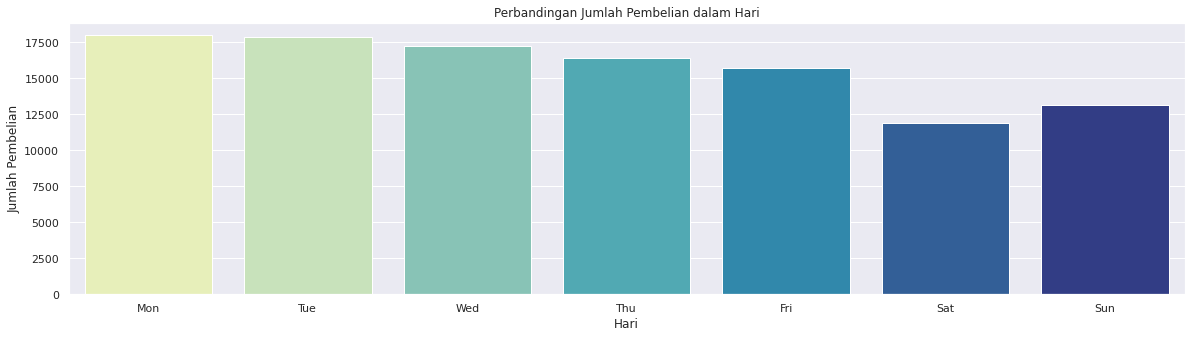

In [ ]:
#bar plot dari banyaknya purchase dalam hari
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.set(rc={'figure.figsize':(20,5)}) #ukuran plot
sns.countplot(df['purchase_dayofweek'],data=df,palette='YlGnBu',order=order)
plt.title('Perbandingan Jumlah Pembelian dalam Hari') #judul dari plot
plt.xlabel('Hari') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

Dapat dilihat bahwa jumlah pembelian terbanyak berada di hari senin, sementara jumlah pembelian paling sedikit berada pada hari sabtu

In [ ]:
#untuk melihat total jumlah pembelian per hari
df['purchase_dayofweek'].value_counts()

Mon    17973
Tue    17857
Wed    17217
Thu    16431
Fri    15693
Sun    13126
Sat    11876
Name: purchase_dayofweek, dtype: int64

#### c. Kecenderungan Waktu Kustomer Membeli pada *E-Commerce*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembelian')

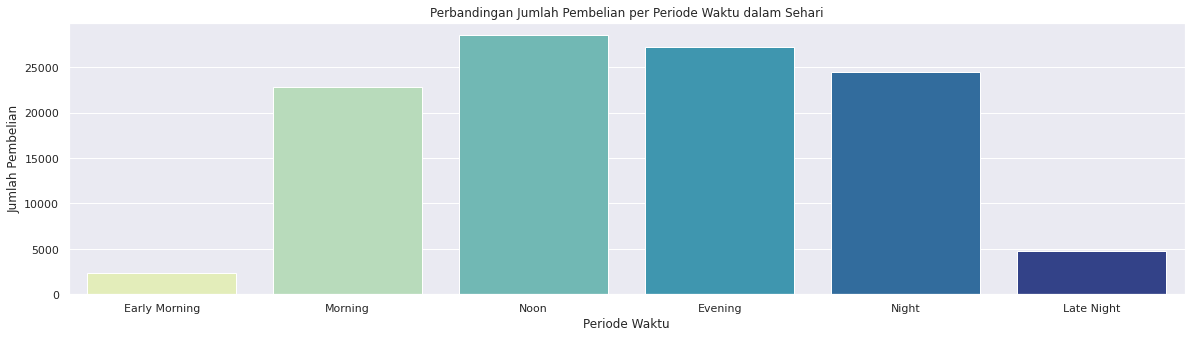

In [ ]:
#bar plot dari banyaknya purchase dalam 6 periode waktu dalam sehari
order=['Early Morning', 'Morning', 'Noon', 'Evening', 'Night', 'Late Night']
sns.countplot(df['purchase_period'],data=df,palette='YlGnBu',order=order)
plt.title('Perbandingan Jumlah Pembelian per Periode Waktu dalam Sehari') #judul dari plot
plt.xlabel('Periode Waktu') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

Dapat dilihat dari plot di atas, *customers* paling banyak melakukan pembelian pada siang hari dan paling sedikit pada dini hari

In [ ]:
#untuk melihat total jumlah pembelian dalam 6 periode waktu dalam sehari
df['purchase_period'].value_counts()

Noon             28506
Evening          27279
Night            24432
Morning          22834
Late Night        4792
Early Morning     2330
Name: purchase_period, dtype: int64

#### d. Perbandingan Jumlah Pembelian Per-bulan pada Tahun 2017 dan 2018

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembelian')

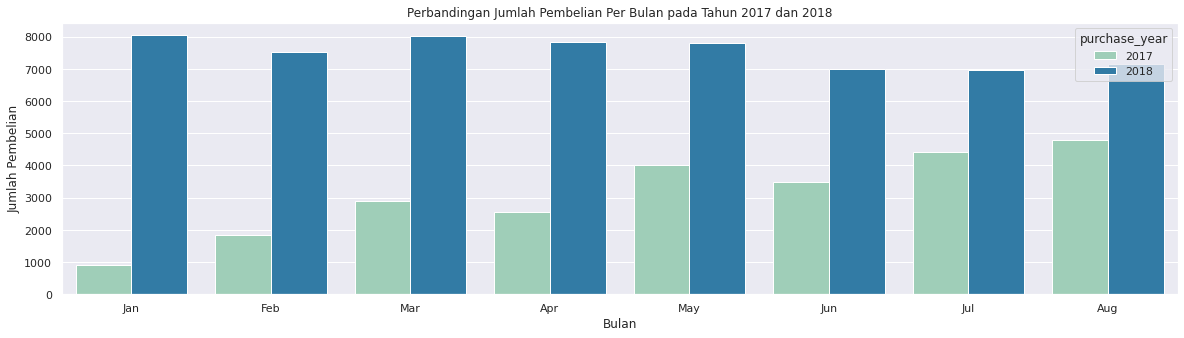

In [ ]:
#bar chart dari perbandingan jumlah pembelian per bulan pada tahun 2017 dan 2018
df_compare = df.query('purchase_year in (2017, 2018) &  month_num <= 8')
year_orders = df_compare['purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'] #label sumbu x
sns.countplot(df_compare['purchase_month'],data=df_compare,hue='purchase_year',palette='YlGnBu',order=order)
plt.title('Perbandingan Jumlah Pembelian Per Bulan pada Tahun 2017 dan 2018') #judul plot
plt.xlabel('Bulan') #label pada sumbu x
plt.ylabel('Jumlah Pembelian') #label pada sumbu y

Dari *bar plot* berikut, dapat dilihat bahwa jumlah pembelian pada tahun 2018 lebih besar dari tahun 2017 setiap bulannya. 
Usaha penjualan yang dilakukan oleh e-commerce Olist sudah cukup optimal pada tahun 2018 dibanding dengan tahun 2017.

In [ ]:
#untuk melihat total jumlah pembelian per bulan pada tahun 2017
df_compare[df_compare['purchase_year']==2017]['purchase_month'].value_counts()

Aug    4797
Jul    4416
May    4003
Jun    3489
Mar    2897
Apr    2569
Feb    1845
Jan     911
Name: purchase_month, dtype: int64

In [ ]:
#untuk melihat total jumlah pembelian per bulan pada tahun 2018
df_compare[df_compare['purchase_year']==2018]['purchase_month'].value_counts()

Jan    8037
Mar    8017
Apr    7827
May    7810
Feb    7518
Aug    7142
Jun    7007
Jul    6960
Name: purchase_month, dtype: int64

#### e. Jumlah Pembelian Berdasarkan Kota

In [ ]:
df_city = df.groupby(by='customer_city', as_index=False).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).reset_index(drop=True) #untuk menghitung jumlah pembelian pada masing-masing kota
df_city_big = df_city.head() #untuk melihat 10 kota dengan jumlah pembelian terbesar
df_city_small = df_city.tail(20) #untuk melihat 10 kota dengan jumlah pembelian terbesar

Text(0, 0.5, 'Kota')

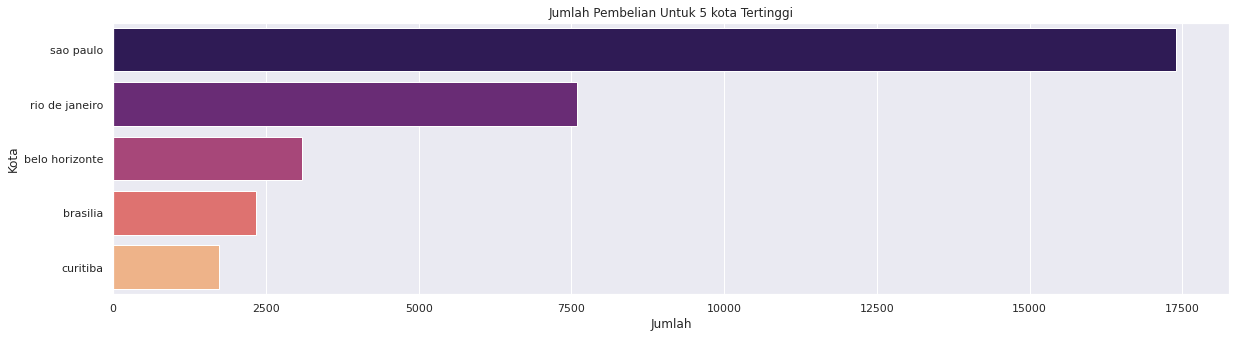

In [ ]:
#plot jumlah pembelian berdasarkan kota (city)
sns.barplot(y='customer_city', x='order_id', data=df_city_big, palette='magma')
plt.title('Jumlah Pembelian Untuk 5 kota Tertinggi') #untuk memberikan judul pada plot
plt.xlabel('Jumlah') #untuk label pada sumbu x
plt.ylabel('Kota') #untuk label pada sumbu y

Dari *plot* berikut, dapat dilihat bahwa kota Sao Paulo memiliki jumlah pembelian terbanyak sedangkan kota Sao Bernardo do Campo memiliki jumlah pembelian tersedikit.

In [ ]:
#untuk melihat total jumlah pembelian untuk 5 kota tertinggi
df_city.sort_values('order_id',ascending=False)

customer_city  order_id
0          sao paulo     17398
1     rio de janeiro      7590
2     belo horizonte      3087
3           brasilia      2341
4           curitiba      1727
...              ...       ...
3387      arenopolis         1
3388         terenos         1
3389      lagoa real         1
3390         araripe         1
4084   manoel urbano         1

[4085 rows x 2 columns]

#### f. Jumlah Customer Berdasarkan State

Text(0, 0.5, 'State')

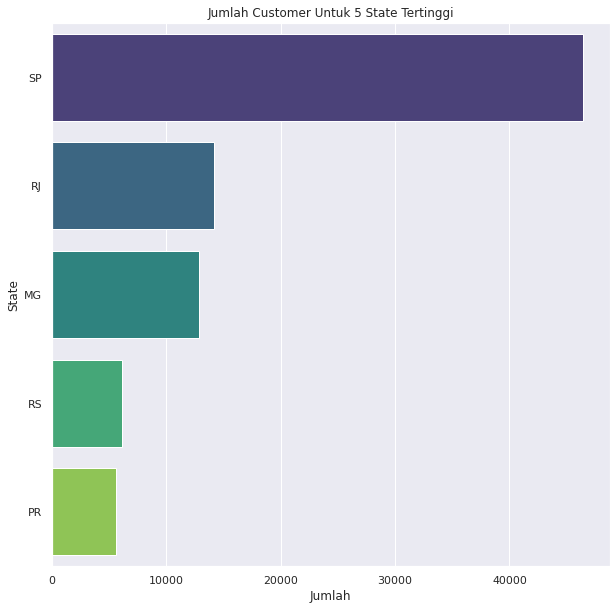

In [ ]:
#plot jumlah customer berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #untuk ukuran plot
sns.countplot(y=df['customer_state'], data=df, palette='viridis',order = df['customer_state'].value_counts().iloc[:5].index) #untuk melihat 10 state dengan jumlah customer terbanyak
plt.title('Jumlah Customer Untuk 5 State Tertinggi') #untuk memberikan judul pada plot
plt.xlabel('Jumlah') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Berdasarkan gambar di atas, jumlah customers terbanyak berasal dari Sao Paulo 

Text(0, 0.5, 'State')

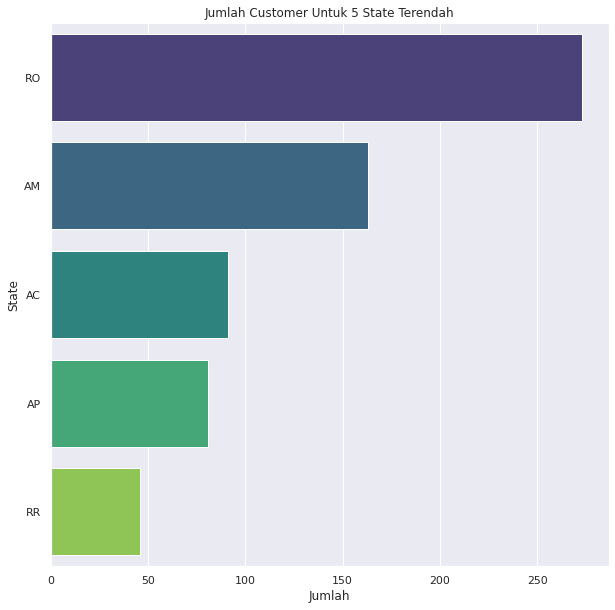

In [ ]:
#plot jumlah customer berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #untuk ukuran plot
sns.countplot(y=df['customer_state'], data=df, palette='viridis',order = df['customer_state'].value_counts().iloc[-5:].index) #untuk melihat 10 state dengan jumlah customer terbanyak
plt.title('Jumlah Customer Untuk 5 State Terendah') #untuk memberikan judul pada plot
plt.xlabel('Jumlah') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Berdasarkan gambar di atas, jumlah *customers* paling sedikit berasal dari Roraima(RR)

In [ ]:
#untuk melihat total jumlah customer untuk 5 state terendah
df['customer_state'].value_counts().iloc[-5:]

RO    273
AM    163
AC     91
AP     81
RR     46
Name: customer_state, dtype: int64

In [ ]:
df['customer_state'].value_counts().iloc[:10]

SP    46435
RJ    14140
MG    12913
RS     6131
PR     5649
SC     4097
BA     3683
DF     2355
GO     2277
ES     2225
Name: customer_state, dtype: int64

### B. Perekonomian *E-Commerce*

#### a. Tren Jumlah Pemasukan

Pemasukan adalah total biaya pemesanan beserta dengan biaya pengirimannya. 

In [ ]:
df_bulan = df.groupby(by=['purchase_year', 'purchase_yearmonth'], as_index=False).agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'}) #untuk menghitung jumlah pembelian, total harga pembelanjaan, dan total harga pengiriman berdasarkan tahun pembelian dan tahun-bulan pembelian
df_bulan['price_per_order'] = df_bulan['price'] / df_bulan['order_id'] #untuk menghitung rata-rata harga per pembelian
df_bulan['freight_per_order'] = df_bulan['freight_value'] / df_bulan['order_id'] #untuk menghitung rata-rata harga pengiriman per pembelian
df_bulan['purchase_yearmonth']=df_bulan['purchase_yearmonth'].astype('str') #untuk mengubah type 'purchase_yearmonth' menjadi 'object'
df_bulan.head() #melihat 5 data teratas dari 'df_bulan'

purchase_year purchase_yearmonth  ...  price_per_order  freight_per_order
0           2016             201609  ...        44.990000           2.830000
1           2016             201610  ...       128.834217          19.698243
2           2016             201612  ...        10.900000           8.720000
3           2017             201701  ...       122.626202          17.184380
4           2017             201702  ...       126.091523          19.924547

[5 rows x 7 columns]

Text(0, 0.5, 'Harga Pembelian')

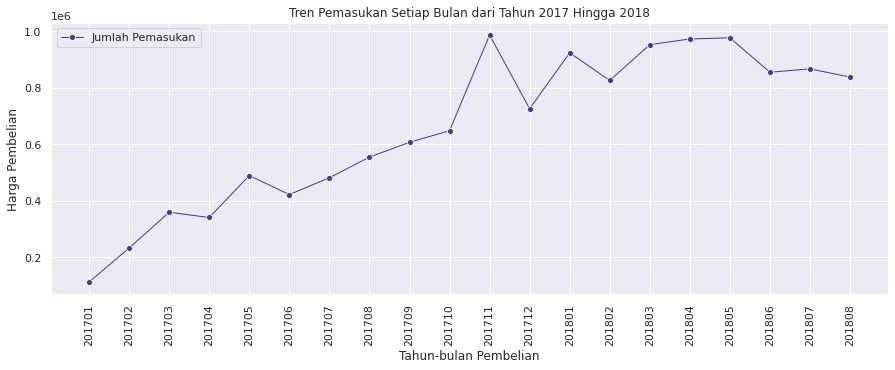

In [ ]:
#plot besar pembelian setiap bulannya dari tahun 2017 sampai 2018
sns.set(rc={'figure.figsize':(15,5)}) #untuk ukuran plot
plt.xticks(rotation=90) #untuk membuat masing-masing label pada sumbu x terrotasi 90 derajat kiri
sns.lineplot(x='purchase_yearmonth', y='price', data=df_bulan[3:], linewidth=1, 
             color='darkslateblue', marker='o', label='Jumlah Pemasukan')
plt.title('Tren Pemasukan Setiap Bulan dari Tahun 2017 Hingga 2018') #untuk memberikan judul pada plot
plt.xlabel('Tahun-bulan Pembelian') #untuk label pada sumbu x
plt.ylabel('Harga Pembelian') #untuk label pada sumbu y

Secara keseluruhan, tren pemasukan mengalami kenaikan untuk setiap bulannya meskipun terdapat penurunan yang cukup besar pada Desember 2017 dan pemasukan mulai mengalami peningkatan yang sedikit pada April 2018

#### b. Jumlah Pembelian

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Jumlah Pembelian')

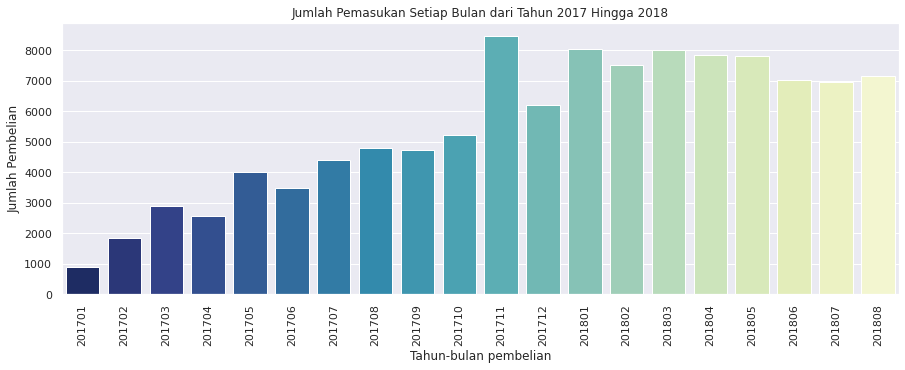

In [ ]:
#bar plot untuk melihat banyak purchase setiap bulannya dari tahun 2017 hingga 2018
plt.xticks(rotation=90) #untuk membuat masing-masing label pada sumbu x terrotasi 90 derajat kiri
sns.countplot(df[df['purchase_year']!=2016]['purchase_yearmonth'], data=df, palette='YlGnBu_r') #agar penulisan label disumbu x dapat dirotasi 90 derajat
plt.title('Jumlah Pemasukan Setiap Bulan dari Tahun 2017 Hingga 2018') #untuk memberikan judul pada plot
plt.xlabel('Tahun-bulan pembelian') #untuk label pada sumbu x
plt.ylabel('Jumlah Pembelian') #untuk label pada sumbu y

Dari bar plot diatas, dapat dilihat bahwa jumlah pemasukan mengalami kenaikan sampai November 2017 meskipun mengalami penurunan pada Desember 2017. Lalu jumlah pemasukan merata setelah Desember 2017

In [ ]:
#untuk melihat jumlah pembelian dari tahun 2017 dan 2018
df['purchase_yearmonth'].value_counts()

201711    8474
201801    8037
201803    8017
201804    7827
201805    7810
201802    7518
201808    7142
201806    7007
201807    6960
201712    6187
201710    5214
201708    4797
201709    4736
201707    4416
201705    4003
201706    3489
201703    2897
201704    2569
201702    1845
201701     911
201610     313
201609       3
201612       1
Name: purchase_yearmonth, dtype: int64

#### c. Harga Total Pembelian Berdasarkan State

Text(0, 0.5, 'State')

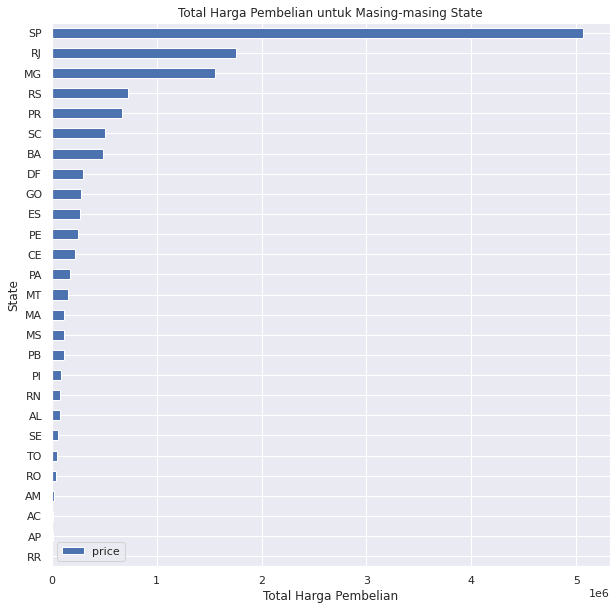

In [ ]:
#bar chart untuk melihat total harga purchase berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'price':'sum'}).sort_values('price').plot(kind='barh') #untuk menghitung total harga pembelian untuk masing-masing state
plt.title('Total Harga Pembelian untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Total Harga Pembelian') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Dapat dilihat bahwa total harga pembelian tertinggi berasal dari *state* Sao Paulo(SP) sementara total harga pembelian terendah berasal dari *state* Roraima(RR)

In [ ]:
df.groupby('customer_state').agg({'price':'sum'}).sort_values('price',ascending=False)

price
customer_state              
SP              5.065805e+06
RJ              1.759473e+06
MG              1.552241e+06
RS              7.282055e+05
PR              6.660635e+05
SC              5.070121e+05
BA              4.935841e+05
DF              2.964984e+05
GO              2.828367e+05
ES              2.686434e+05
PE              2.518895e+05
CE              2.196774e+05
PA              1.744706e+05
MT              1.521916e+05
MA              1.169294e+05
MS              1.154300e+05
PB              1.125868e+05
PI              8.472100e+04
RN              8.210566e+04
AL              7.885572e+04
SE              5.657419e+04
TO              4.840251e+04
RO              4.568276e+04
AM              2.215584e+04
AC              1.593097e+04
AP              1.337481e+04
RR              7.057470e+03

#### d. Harga Rata-Rata Berdasarkan State

Text(0, 0.5, 'State')

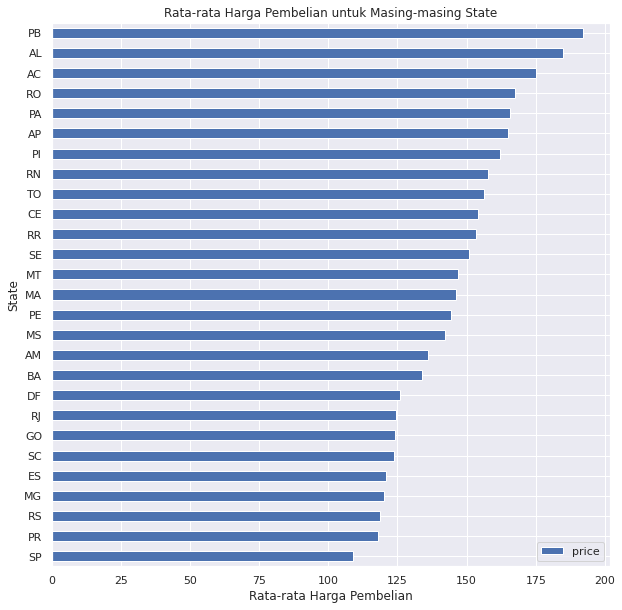

In [ ]:
#bar chart untuk melihat harga produk rata-rata berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'price':'mean'}).sort_values('price').plot(kind='barh') #untuk menghitung rata-rata harga pembelian masing-masing state
plt.title('Rata-rata Harga Pembelian untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Rata-rata Harga Pembelian') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Dapat dilihat bahwa *state* Paraiba (PB) memiliki rata-rata harga pembelian tertinggi, sementara *state* Sao Paulo (SP) memiliki rata rata harga pembelian terendah

In [ ]:
df.groupby('customer_state').agg({'price':'mean'}).sort_values('price',ascending=False)

price
customer_state            
PB              192.127679
AL              184.673817
AC              175.065604
RO              167.336117
PA              165.531869
AP              165.121111
PI              161.990440
RN              157.592438
TO              156.137129
CE              154.159572
RR              153.423261
SE              150.864507
MT              146.761446
MA              146.344668
PE              144.266604
MS              142.330419
AM              135.925399
BA              134.016872
DF              125.901660
RJ              124.432330
GO              124.214625
SC              123.752045
ES              120.738629
MG              120.207623
RS              118.774340
PR              117.908216
SP              109.094547

#### e. Tren Rata-Rata Harga Pengiriman

Text(0, 0.5, 'Rata-rata Harga Pengiriman per Pembelian')

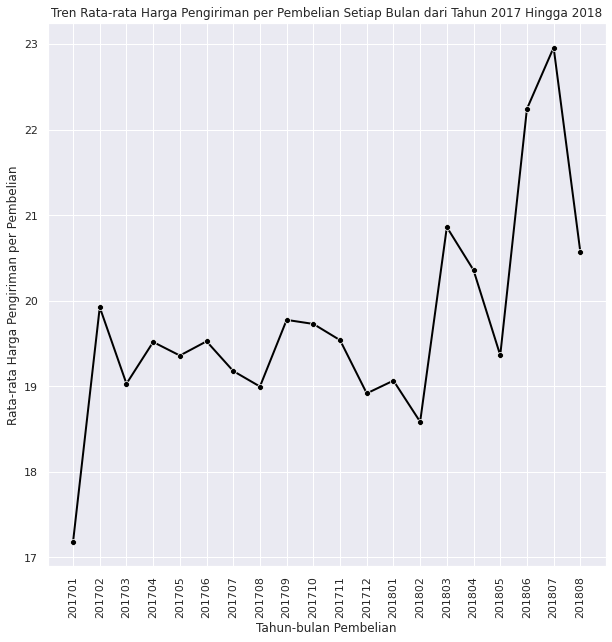

In [ ]:
#line plot untuk melihat tren rata-rata harga pengirimian per pembelian setiap bulannya dari tahun 2017 hingga 2018
plt.xticks(rotation=90) #agar penulisan label disumbu x dapat dirotasi 90 derajat
sns.lineplot(x='purchase_yearmonth', y='freight_per_order', data=df_bulan[3:], linewidth=2, 
             color='black', marker='o')
plt.title('Tren Rata-rata Harga Pengiriman per Pembelian Setiap Bulan dari Tahun 2017 Hingga 2018') #untuk memberikan judul pada plot
plt.xlabel('Tahun-bulan Pembelian') #untuk label pada sumbu x
plt.ylabel('Rata-rata Harga Pengiriman per Pembelian') #untuk label pada sumbu y

Dari grafik di atas, tren rata-rata pengiriman per order mengalami kenaikan yg pada Februari 2017 dan merata setelahnya hingga Februari 2018. Lalu secara keseluruhan, setelah Februari 2018 mengalami peningkatan yang besar meskipun mengalami beberapa penurunan kecil dan penurunan yang besar pada Agustus 2018

#### f. Total Harga Pengiriman Berdasarkan State

Text(0, 0.5, 'State')

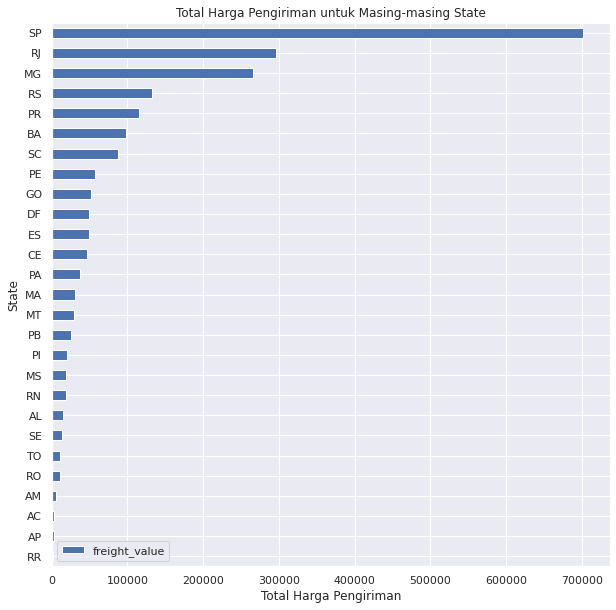

In [ ]:
#bar chart untuk melihat total harga pengiriman berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'freight_value':'sum'}).sort_values('freight_value').plot(kind='barh') #untuk menghitung total harga pengiriman untuk maisng-masing state
plt.title('Total Harga Pengiriman untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Total Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Total harga pengiriman terbesar adalah pengiriman ke Sao Paulo(SP), sementara yang terendah adalah ke Roraima(RR)

In [ ]:
#untuk melihat total harga pengiriman pada setiap state mulai dari yang terendah hingga ke tertinggi
df.groupby('customer_state').agg({'freight_value':'sum'}).sort_values('freight_value')

freight_value
customer_state               
RR                    1982.05
AP                    2767.00
AC                    3644.36
AM                    5429.63
RO                   11283.24
TO                   11604.86
SE                   13714.94
AL                   15316.77
RN                   18609.12
MS                   18937.58
PI                   20457.19
PB                   25251.73
MT                   29032.80
MA                   30767.35
PA                   37552.98
CE                   46652.57
ES                   49014.48
DF                   49624.94
GO                   51375.65
PE                   57082.56
SC                   88115.65
BA                   97553.67
PR                  115645.29
RS                  132519.26
MG                  266358.93
RJ                  295705.63
SP                  701846.52

#### g. Rata-Rata Harga Pengiriman Berdasarkan State

Text(0, 0.5, 'State')

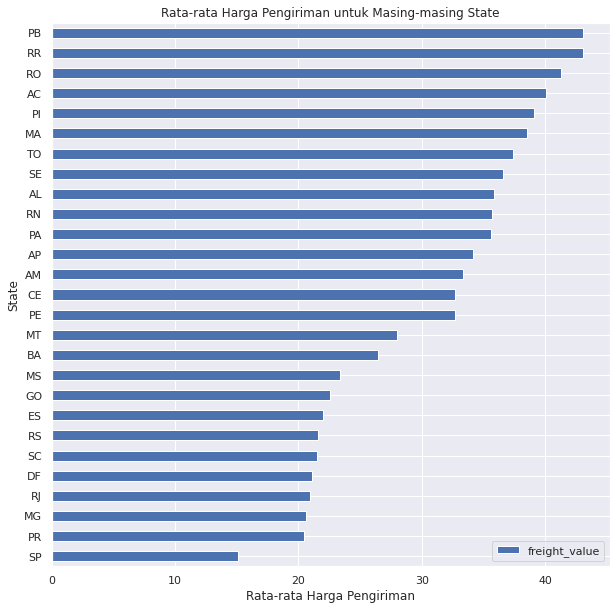

In [ ]:
#bar chart untuk melihat rata-rata harga pengiriman berdasarkan state
sns.set(rc={'figure.figsize':(10,10)}) #ukuran plot
df.groupby('customer_state').agg({'freight_value':'mean'}).sort_values('freight_value').plot(kind='barh') #untuk menghitung rata-rata harga pengiriman untuk maisng-masing state
plt.title('Rata-rata Harga Pengiriman untuk Masing-masing State') #untuk memberikan judul pada plot
plt.xlabel('Rata-rata Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Rata-rata harga pengiriman tertinggi adalah pengiriman ke *state* Paraiba(PB) sementera terendah adalah pengiriman ke Sao Paulo(SP)

In [ ]:
#untuk melihat rata-rata harga pengiriman pada setiap state mulai dari yang tertinggi hingga ke terendah
df.groupby('customer_state').agg({'freight_value':'mean'}).sort_values('freight_value',ascending=False)

freight_value
customer_state               
PB                  43.091689
RR                  43.088043
RO                  41.330549
AC                  40.047912
PI                  39.115086
MA                  38.507322
TO                  37.435032
SE                  36.573173
AL                  35.870656
RN                  35.718081
PA                  35.629013
AP                  34.160494
AM                  33.310613
CE                  32.738646
PE                  32.693333
MT                  27.996914
BA                  26.487556
MS                  23.350900
GO                  22.562868
ES                  22.028980
RS                  21.614624
SC                  21.507359
DF                  21.072161
RJ                  20.912704
MG                  20.627192
PR                  20.471816
SP                  15.114601

#### h. Analisis Pengiriman

In [ ]:
purchasing = df['order_purchase_timestamp']
delivered = df['order_delivered_customer_date']
estimated = df['order_estimated_delivery_date']
df['time_to_delivery'] = delivered - purchasing #untuk menghitung lama waktu pengiriman barang
df['diff_estimated_delivery'] = delivered - estimated #untuk menghitung perbedaan sampainya pengiriman barang dari waktu yang diestimasi

In [ ]:
df['time_to_delivery'] = df['time_to_delivery'].apply(lambda x: x/ np.timedelta64(1, 'h')) #untuk mengubah format dari 'time_to_delivery' ke dalam jam
df['diff_estimated_delivery'] = df['diff_estimated_delivery'].apply(lambda x: x/ np.timedelta64(1, 'h')) #untuk mengubah format dari 'diff_estimated_delivery' ke dalam jam

In [ ]:
df_state = df.groupby(by='customer_state', as_index=False).mean() #untuk menghitung rata-rata setiap variabel numerik dari data berdasarkan state
state_freight= df_state.loc[:, ['customer_state', 'freight_value']].sort_values(by='freight_value', ascending=False) #untuk mengurutkan state berdasarkan harga pengiriman
state_time_to_delivery = df_state.loc[:, ['customer_state', 'time_to_delivery']].sort_values(by='time_to_delivery', ascending=False) #untuk mengurutkan state berdasarkan lama waktu pengiriman barang 
state_estimated_delivery = df_state.loc[:, ['customer_state', 'diff_estimated_delivery']].sort_values(by='diff_estimated_delivery') #untuk mengurutkan state berdasarkan perbedaan sampainya pengiriman barang dari waktu yang diestimasi

In [ ]:
#untuk melihat perbedaan sampainya pengiriman barang dari waktu yang diestimasi
state_estimated_delivery

customer_state  diff_estimated_delivery
0              AC              -487.988181
20             RO              -464.186358
2              AM              -461.424899
3              AP              -426.441255
21             RR              -422.841002
12             MT              -333.504799
13             PA              -325.664633
22             RS              -322.324935
19             RN              -318.399827
17             PR              -307.008811
15             PE              -306.346393
10             MG              -303.323762
14             PB              -296.917988
26             TO              -279.607716
8              GO              -278.302221
6              DF              -275.833177
18             RJ              -271.249384
23             SC              -260.839252
16             PI              -260.451839
11             MS              -252.686750
25             SP              -252.269418
5              CE              -249.668394
4              BA              -246.925482
7              ES              -238.781078
24             SE              -223.817613
9              MA              -220.860777
1              AL              -193.376353

Karena seluruh *state* memiliki perbedaan waktu *delivery* dan estimasi bernilai negatif, artinya **pengiriman pada seluruh *state* tiba terlebih dahulu daripada estimasi waktu yang diperkirakan**.

In [ ]:
#Akan dimutlakkan selisih dari perbedaan waktu delivery dan estimasi, yaitu kolom 'diff_estimated_delivery'
state_estimated_delivery['diff_estimated_delivery']=state_estimated_delivery['diff_estimated_delivery'].abs()
state_estimated_delivery #akan dicetak untuk dilihat hasil mutlaknya

customer_state  diff_estimated_delivery
0              AC               487.988181
20             RO               464.186358
2              AM               461.424899
3              AP               426.441255
21             RR               422.841002
12             MT               333.504799
13             PA               325.664633
22             RS               322.324935
19             RN               318.399827
17             PR               307.008811
15             PE               306.346393
10             MG               303.323762
14             PB               296.917988
26             TO               279.607716
8              GO               278.302221
6              DF               275.833177
18             RJ               271.249384
23             SC               260.839252
16             PI               260.451839
11             MS               252.686750
25             SP               252.269418
5              CE               249.668394
4              BA               246.925482
7              ES               238.781078
24             SE               223.817613
9              MA               220.860777
1              AL               193.376353

Text(0, 0.5, 'State')

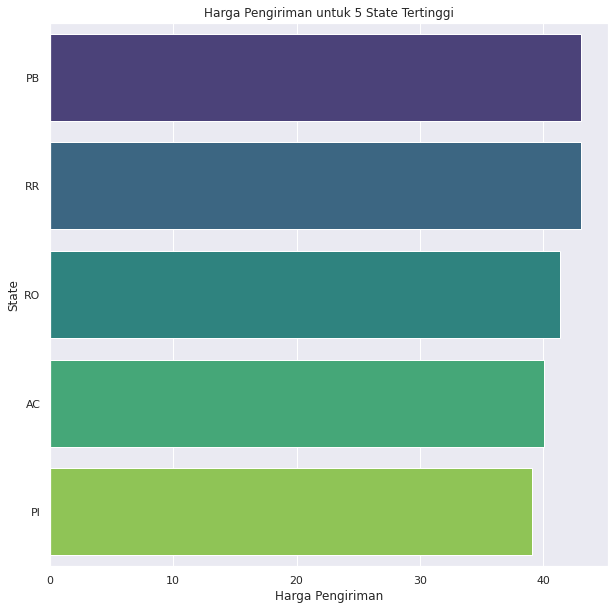

In [ ]:
#untuk melihat 5 state yang memiliki harga pengiriman tertinggi
sns.barplot(x='freight_value', y='customer_state', data=state_freight.head(), palette='viridis')
plt.title('Harga Pengiriman untuk 5 State Tertinggi') #untuk memberikan judul pada plot
plt.xlabel('Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Dapat dilihat bahwa harga pengiriman tertinggi adalah harga pengiriman ke Paraiba(PB)

In [ ]:
#untuk melihat harga pengiriman untuk 5 state tertinggi
state_freight[['customer_state','freight_value']].sort_values('freight_value',ascending=False)[:5]

customer_state  freight_value
14             PB      43.091689
21             RR      43.088043
20             RO      41.330549
0              AC      40.047912
16             PI      39.115086

Text(0, 0.5, 'State')

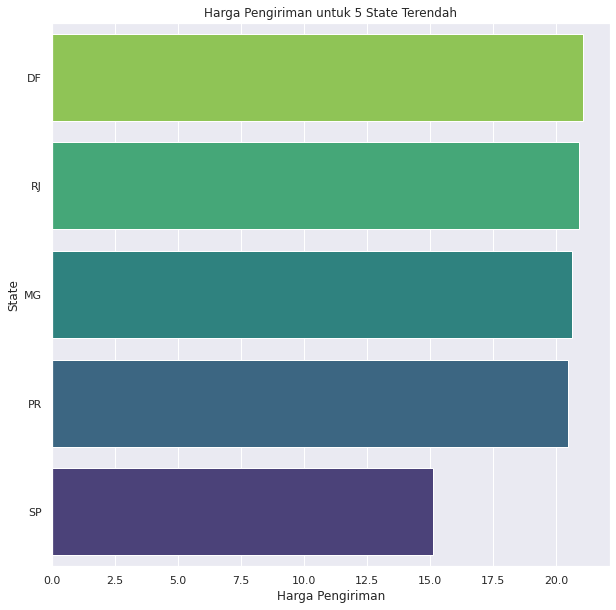

In [ ]:
#untuk melihat 5 state terendah yang memiliki harga pengiriman terendah
sns.barplot(x='freight_value', y='customer_state', data=state_freight.tail(), palette='viridis_r')
plt.title('Harga Pengiriman untuk 5 State Terendah') #untuk memberikan judul pada plot
plt.xlabel('Harga Pengiriman') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Sementara harga pengiriman terendah adalah harga pengiriman ke Sao Paulo(SP)

In [ ]:
#untuk melihat harga pengiriman untuk 5 state terendah
state_freight[['customer_state','freight_value']].sort_values('freight_value',ascending=False).tail()

customer_state  freight_value
6              DF      21.072161
18             RJ      20.912704
10             MG      20.627192
17             PR      20.471816
25             SP      15.114601

Text(0, 0.5, 'State')

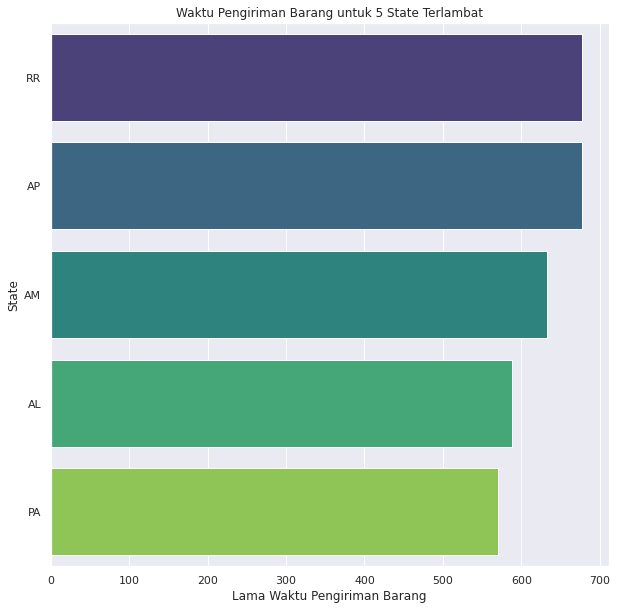

In [ ]:
#untuk melihat 5 state terendah yang memiliki lama waktu pengiriman barang terlama
sns.barplot(x='time_to_delivery', y='customer_state', data=state_time_to_delivery.head(), palette='viridis')
plt.title('Waktu Pengiriman Barang untuk 5 State Terlambat') #untuk memberikan judul pada plot
plt.xlabel('Lama Waktu Pengiriman Barang') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Dapat dilihat bahwa pengiriman ke *state* Roraima(RR) memiliki waktu yang terlama

In [ ]:
#untuk melihat waktu pengiriman untuk 5 state terlambat (dalam jam)
state_time_to_delivery[['customer_state','time_to_delivery']].sort_values('time_to_delivery',ascending=False).head()

customer_state  time_to_delivery
21             RR        677.544275
3              AP        676.943035
2              AM        633.383212
1              AL        587.739403
13             PA        570.097281

Text(0, 0.5, 'State')

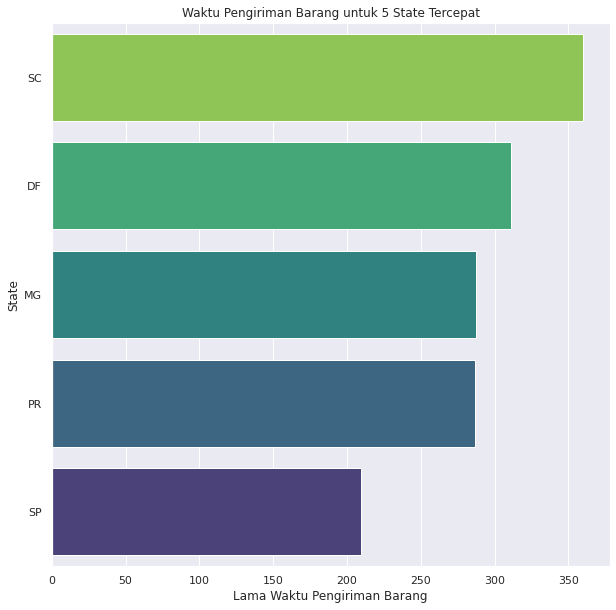

In [ ]:
#untuk melihat 5 state tertinggi yang memiliki lama waktu pengiriman barang terlama
sns.barplot(x='time_to_delivery', y='customer_state', data=state_time_to_delivery.tail(), palette='viridis_r')
plt.title('Waktu Pengiriman Barang untuk 5 State Tercepat') #untuk memberikan judul pada plot
plt.xlabel('Lama Waktu Pengiriman Barang') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Sementara *state* Sao Paulo(SP) memiliki waktu pengiriman tercepat

In [ ]:
#untuk melihat waktu pengiriman untuk 5 state tercepat (dalam jam)
state_time_to_delivery[['customer_state','time_to_delivery']].sort_values('time_to_delivery',ascending=False).tail()

customer_state  time_to_delivery
23             SC        359.943437
6              DF        311.015835
10             MG        287.556996
17             PR        286.733214
25             SP        209.343141

Text(0, 0.5, 'State')

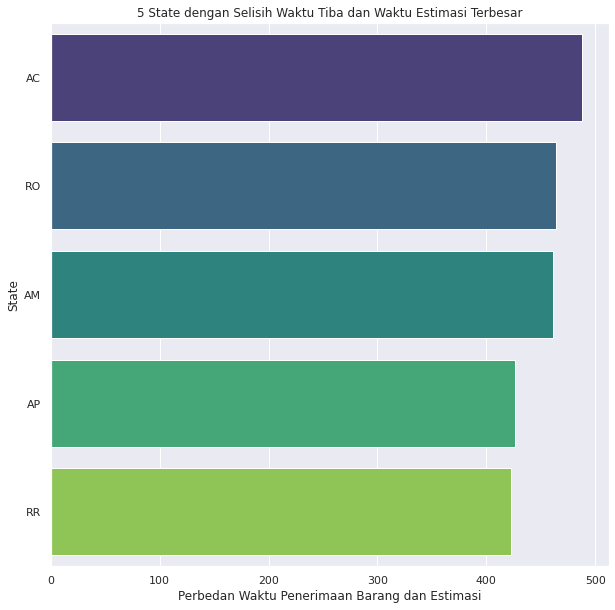

In [ ]:
#untuk melihat 5 state dengan selisih waktu tiba dan waktu estimasi terbesar
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=state_estimated_delivery.head(), palette='viridis')
plt.title('5 State dengan Selisih Waktu Tiba dan Waktu Estimasi Terbesar') #untuk memberikan judul pada plot
plt.xlabel('Perbedan Waktu Penerimaan Barang dan Estimasi') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Dapat dilihat bahwa terdapat pengiriman ke *state* Acre(AC) yang memiliki waktu pengiriman tercepat yang lebih cepat dari waktu estimasinya

In [ ]:
#untuk melihat selisih waktu tiba dan waktu estimasi terbesar untuk 5 state terbesar
state_estimated_delivery[['customer_state','diff_estimated_delivery']].sort_values('diff_estimated_delivery',ascending=False).head()

customer_state  diff_estimated_delivery
0              AC               487.988181
20             RO               464.186358
2              AM               461.424899
3              AP               426.441255
21             RR               422.841002

Text(0, 0.5, 'State')

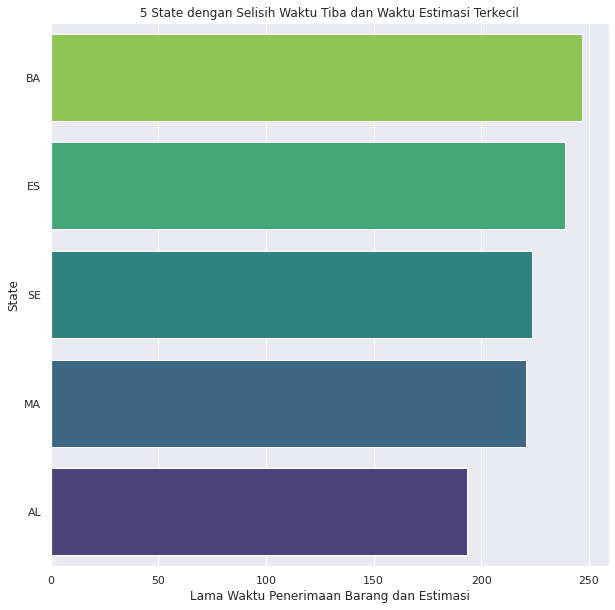

In [ ]:
#untuk melihat 5 state dengan selisih waktu tiba dan waktu estimasi terkecil
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=state_estimated_delivery.tail(), palette='viridis_r')
plt.title('5 State dengan Selisih Waktu Tiba dan Waktu Estimasi Terkecil') #untuk memberikan judul pada plot
plt.xlabel('Lama Waktu Penerimaan Barang dan Estimasi') #untuk label pada sumbu x
plt.ylabel('State') #untuk label pada sumbu y

Pada *state* Alagoas(AL) terdapat waktu pengiriman terlambat yang lebih cepat dari waktu estimasinya

In [ ]:
#untuk melihat selisih waktu tiba dan waktu estimasi untuk 5 state terkecil
state_estimated_delivery[['customer_state','diff_estimated_delivery']].sort_values('diff_estimated_delivery',ascending=False).tail()

customer_state  diff_estimated_delivery
4              BA               246.925482
7              ES               238.781078
24             SE               223.817613
9              MA               220.860777
1              AL               193.376353

# III. *Clustering*

Aplikasi *clustering* pada data ini bertujuan untuk mensegmentasi *customer*, sehingga e-commerce Olist dapat mengaplikasikan strategi penjualan/marketing yang sesuai dengan karakteristik *customer* tersebut.

## 1. Persiapan Dataset

Oleh karena yang dianalisis merupakan karakteristik *customer*, maka data sebelumnya dikelompokkan berdasarkan *customer*nya. 


In [ ]:
df['latest'] = max(df['order_purchase_timestamp']) #untuk menghitung kapan terakhir kali pembelanjaan dilakukan oleh semua orang
df['range_time'] = df['latest'] - df['order_purchase_timestamp'] #untuk menghitung berapa lama selisih waktu dari pembelanjaan terakhir dari semua orang dan pembelanjaan per pembelian
recent = df.groupby('customer_unique_id').agg({
    'range_time': 'min'}).reset_index(drop=True) #untuk mencari 'range_time' paling minimal berdasarkan customer
df_cust = df.groupby('customer_unique_id').agg({'order_id': 'count',
                                           'price': 'sum',
                                           'freight_value':'sum'}).reset_index(drop=True) #untuk menghitung jumlah pembelian, total harga pembelanjaan, dan total harga pengiriman berdasarkan customer
df_cust.head() #untuk melihat 5 data teratas dari df_cust

order_id   price  freight_value
0         1  129.90          12.00
1         1   18.90           8.29
2         1   69.00          17.22
3         1   25.99          17.63
4         1  180.00          16.89

In [ ]:
df

Karakteristik yang diukur pada *clustering* ini yaitu *recency*, *frequency*, dan *monetary*. 
1. ***Recency*** bertujuan untuk mengukur kapan terakhir kali suatu customer melakukan pembelian pada Olist. Untuk menentukan variabel ini diawali dengan menentukan pembelian terakhir yang tercatat pada dataset ini. Kemudian tanggal tersebut dikurangi oleh seluruh tanggal pembelian, yakni *order_purchase_timestamp*. Selanjutnya, data dikelompokkan berdsasarkan masing-masing *customer* dan dipilih selisih yang paling minimum. Oleh karena itu, nilai yang semakin kecil menunjukkan bahwa *customer* baru saja melakukan pembelian.
2. ***Frequency*** bertujuan untuk mengukur seberapa sering seorang *customer* melakukan pembelian pada Olist. Oleh karena itu, data dikelompokkan berdasarkan *customer* dan kemudian dihitung berapa kali *customer* tersebut melakukan pembelian pada Olist.
3. ***Monetary*** bertujuan untuk mengukur seberapa banyak uang yang dikeluarkan oleh *customer* pada Olist. Oleh karena itu, data dikelompokkan berdasarkan *customer* dan kemudian dihitung jumlah pengeluaran dari seluruh pembelian yang dilakukan pada Olist untuk masing-masing *customer*.

In [ ]:
rfm = pd.DataFrame() #untuk membuat data frame baru
rfm['recency'] = recent['range_time'].astype('timedelta64[D]') #untuk mengubah tipe data 'range.time' ke dalam waktu
rfm['frequency'] = df_cust['order_id'] #untuk menghitung frekuensi pembelanjaan per customer yang disimpan dalam variabel 'frequency'
rfm['monetary']=df_cust['price'] + df_cust['freight_value'] #untuk menghitung total harga pembelanjaan dan harga pengirimannya per customer yang disimpan dalam variabel 'monetary'

rfm.head() #untuk melihat 5 data teratas dari ref

recency  frequency  monetary
0    111.0          1    141.90
1    114.0          1     27.19
2    536.0          1     86.22
3    320.0          1     43.62
4    287.0          1    196.89

## 2. *Remove Outlier* untuk Proses Clustering

Sebelum diaplikasikan *clustering*, dianalisis terlebih dahulu apakah ada data yang diperkirakan sebagai *outlier*. Pada analisis ini diaplikasikan *isolation forest*. Hal tersebut disebabkan *isolation forest* menentukan *outlier*  secara multivariat, sehingga kami merasa metode ini lebih sesuai untuk menentukan *outlier*.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah Data Outlier dan Bukan Outlier Oleh Isolation Forest')

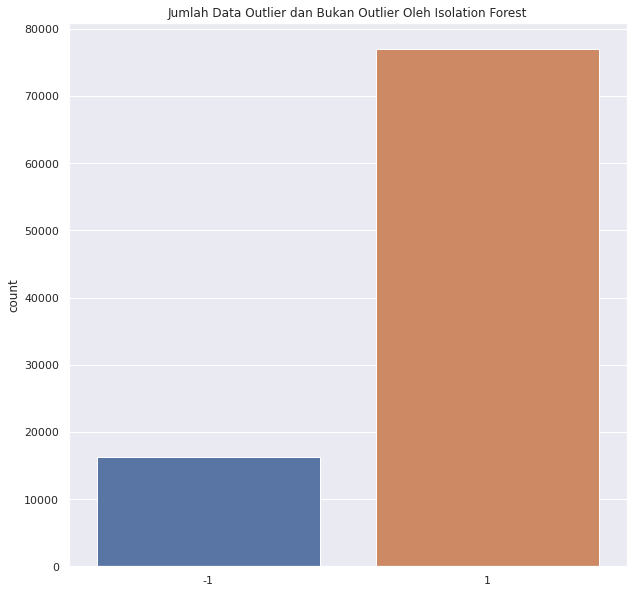

In [ ]:
#akan digunakan Isolation Forest untuk mengecek data manakah yang dianggap outlier dengan memperhatikan seluruh variabel secara bersamaan
clf = IsolationForest(random_state=42)
clf.fit(rfm)
y_pred_train = clf.predict(rfm)
#akan di plot jumlah data yang dihitung sebagai outlier dan yang bukan outlier
sns.countplot(y_pred_train)
plt.title('Jumlah Data Outlier dan Bukan Outlier Oleh Isolation Forest') #untuk memberikan judul pada plot

Oleh karena jumlah *outlier* cukup banyak, maka dari itu *outlier* dianalisis secara terpisah.

In [ ]:
rfm['Outlier']=y_pred_train #untuk menambahkan kolom 'outlier' sebagai keterangan data tersebut outlier atau bukan
rfm.head() #untuk melihat 5 data teratas dari rfm yang baru

recency  frequency  monetary  Outlier
0    111.0          1    141.90        1
1    114.0          1     27.19        1
2    536.0          1     86.22        1
3    320.0          1     43.62        1
4    287.0          1    196.89        1

## 3. Analisis Data

###Kasus 1: Bukan *Outlier*

Berikut merupakan karakteristik secara umum data bukan *outlier*. Jika diperhatikan, terlihat bahwa frekuensi pengguna hanya berkisar 1-2. Oleh karena itu, dapat disimpulkan bahwa pada data bukan *outlier* *customer*-nya merupakan pengguna/pembeli awal.

In [ ]:
rfm[rfm['Outlier']==1].describe() #untuk melihat statistika deskriptif dari data yang dianggap bukan outlier

recency     frequency      monetary  Outlier
count  77043.000000  77043.000000  77043.000000  77043.0
mean     225.794297      1.021975    116.688285      1.0
std      140.945379      0.146602     79.461648      0.0
min        0.000000      1.000000     10.070000      1.0
25%      113.000000      1.000000     57.820000      1.0
50%      210.000000      1.000000     95.650000      1.0
75%      324.000000      1.000000    154.670000      1.0
max      561.000000      2.000000    512.210000      1.0

### Kasus 2: *Outlier*

Meskipun data bukan *outlier* merupakan pengguna awal, akan tetapi data *outlier* juga memuat pengguna awal maupun pengguna lama.

In [ ]:
rfm[rfm['Outlier']==-1].describe() #untuk melihat statistika deskriptif dari data yang dianggap outlier

recency     frequency      monetary  Outlier
count  16293.000000  16293.000000  16293.000000  16293.0
mean     289.436445      1.929479    394.416666     -1.0
std      189.843446      1.194656    447.090166      0.0
min        0.000000      1.000000      9.590000     -1.0
25%      113.000000      1.000000    127.060000     -1.0
50%      277.000000      2.000000    258.440000     -1.0
75%      457.000000      2.000000    515.310000     -1.0
max      713.000000     24.000000  13664.080000     -1.0

## 4. Aplikasi *Clustering*

### Kasus 1: Bukan *Outlier*

In [ ]:
rfm_noout=rfm[rfm['Outlier']==1] #untuk mengambil data yang bukan outlier
rfm_noout.drop('Outlier',axis=1,inplace=True) #kolom 'outlier' akan di drop karena tidak akan digunakan dalam melakukan clustering
rfm_noout.head() #untuk melihat 5 data teratas dari data yang bukan outlier (rfm_noout)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


recency  frequency  monetary
0    111.0          1    141.90
1    114.0          1     27.19
2    536.0          1     86.22
3    320.0          1     43.62
4    287.0          1    196.89

**Plot distribusi dari RFM (*recency, frequency, monetary*)**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

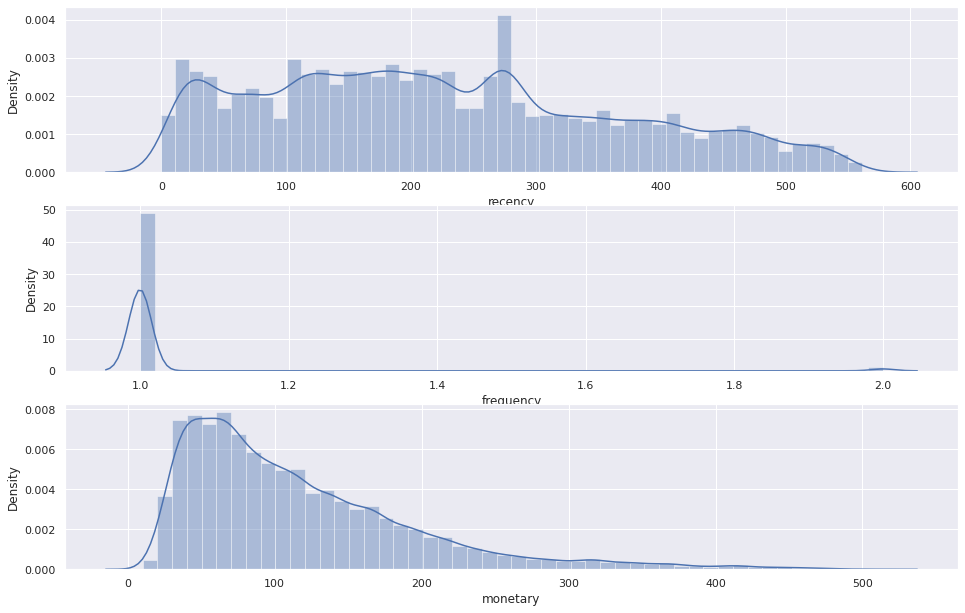

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(16,14))
# Plot distribusi dari recency
plt.subplot(4, 1, 1); sns.distplot(rfm_noout['recency'])
# Plot distribusi dari frequency
plt.subplot(4, 1, 2); sns.distplot(rfm_noout['frequency'])
# Plot distribusi dari monetary
plt.subplot(4, 1, 3); sns.distplot(rfm_noout['monetary'])
#menampilkan plot dari recency, frequency, dan monetary
plt.show()

Selanjutnya, akan dilakukan normalisasi agar setiap variabel dapat memiliki satuan pengukuran yang sama tanpa mengubah distribusi data untuk mendapatkan interpretasi yang lebih baik.

**Proses Normalisasi**

In [ ]:
rfm_norm = preprocessing.normalize(rfm_noout)
rfm_norm_df = pd.DataFrame(rfm_norm)
rfm_norm_df.describe().round(2)

0         1         2
count  77043.00  77043.00  77043.00
mean       0.78      0.01      0.49
std        0.25      0.00      0.29
min        0.00      0.00      0.03
25%        0.67      0.00      0.24
50%        0.89      0.00      0.45
75%        0.97      0.01      0.74
max        1.00      0.05      1.00

Pada aplikasi *clustering* ini digunakan metode k-means. Untuk menggunakan metode tersebut, akan ditentukan terlebih dahulu nilai k yang sesuai mempertimbangkan elbow method dan sillhouette score. 

**Penentuan nilai k yang optimal dengan menggunakan *Elbow Method***

Text(0.5, 0, 'Nilai k')

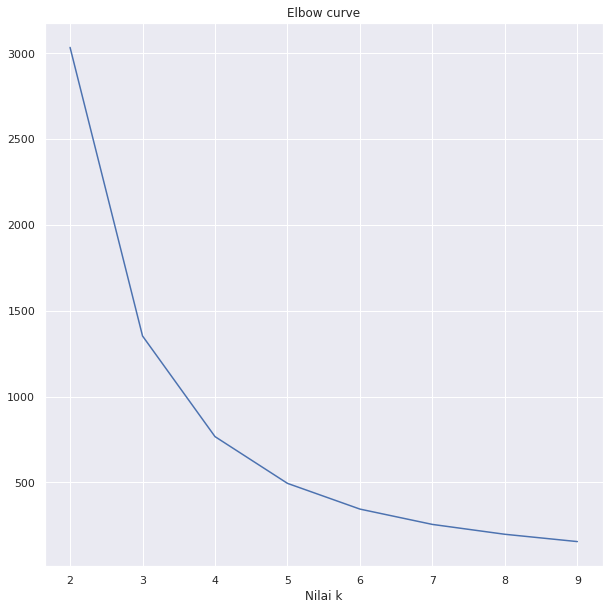

In [ ]:
distorsions, k1, kN = [], 2, 10 #akan dihitung elbow method dengan mengambil nilai k dari 2 sampai 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k,init='k-means++').fit(rfm_norm_df)
    distorsions.append(kmeans.inertia_)
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('Nilai k') #untuk label pada sumbu x 

Dapat dilihat bahwa, nilai k yang optimal dengan *elbow method* adalah 4 atau 5

**Penentuan nilai k yang optimal dengan menggunakan *Silhouette Score***

For n_clusters = 2 The average silhouette_score is : 0.6465324308863257
For n_clusters = 3 The average silhouette_score is : 0.606147324320704
For n_clusters = 4 The average silhouette_score is : 0.5811551220787947
For n_clusters = 5 The average silhouette_score is : 0.5676850801194426
For n_clusters = 6 The average silhouette_score is : 0.5533882002672137
For n_clusters = 7 The average silhouette_score is : 0.5465468405513816


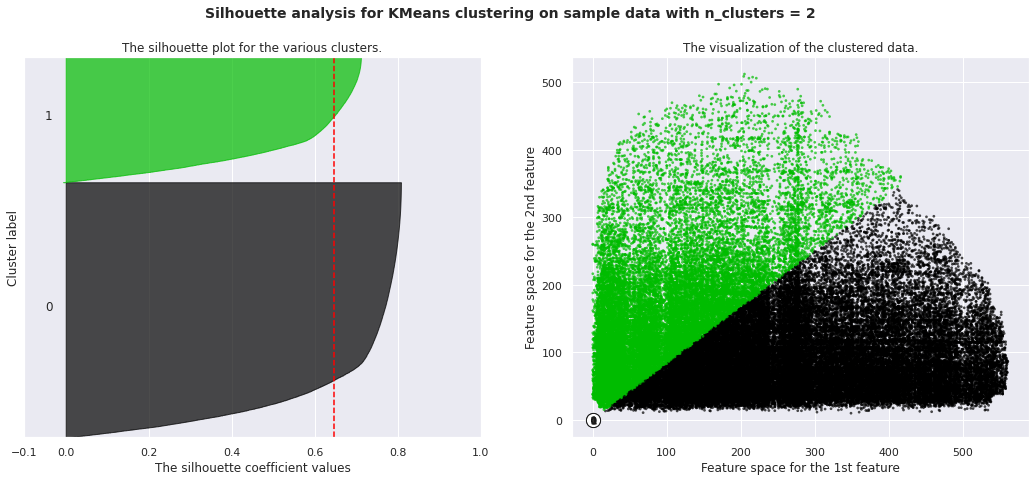

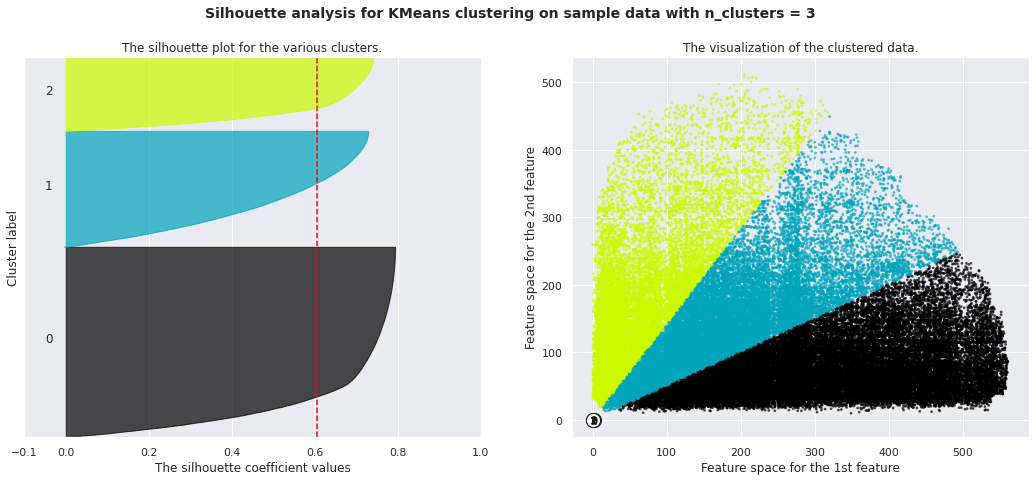

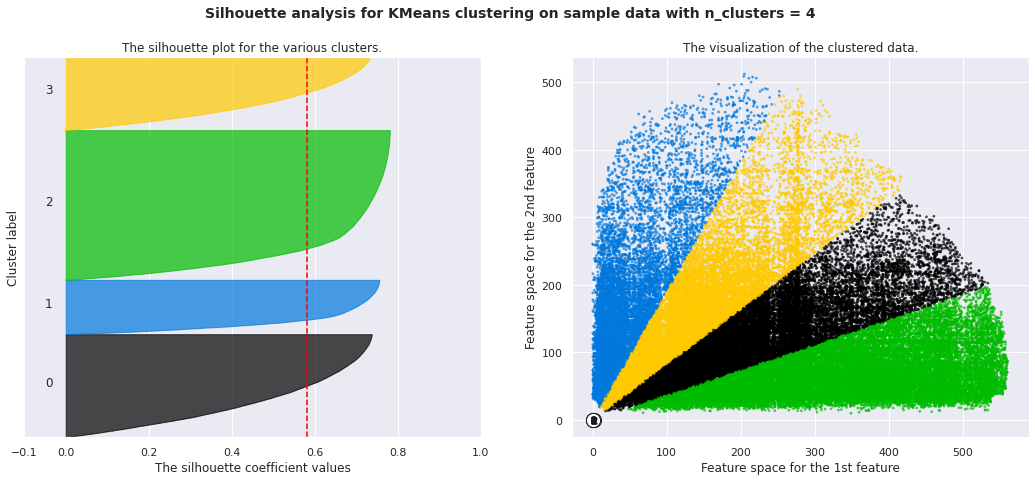

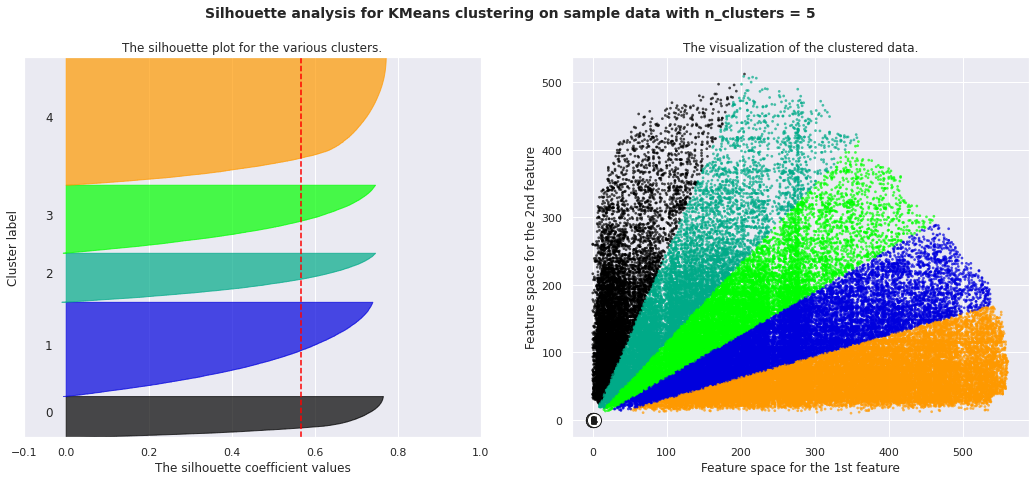

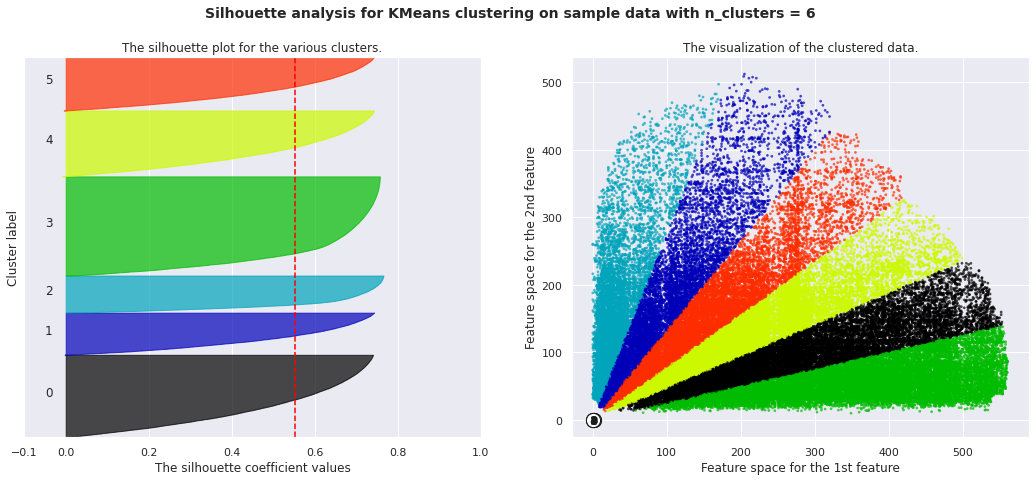

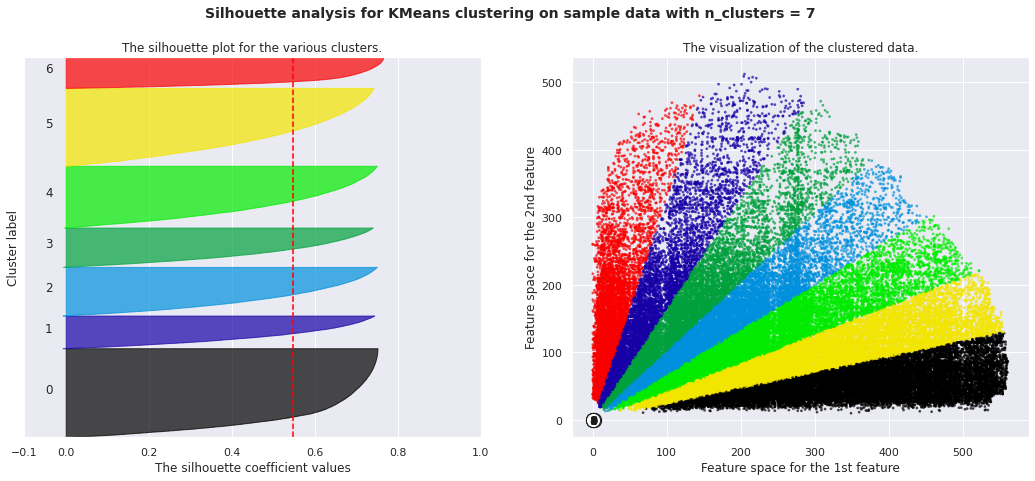

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(rfm_norm_df) + (n_clusters + 1) * 10])
    clusterer = cluster.KMeans(n_clusters=n_clusters, init='k-means++', random_state=99)
    cluster_labels = clusterer.fit_predict(rfm_norm_df)
    silhouette_avg = silhouette_score(rfm_norm_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(rfm_norm_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(rfm_noout['recency'], rfm_noout['monetary'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Dapat dilihat, nilai k yang optimal berdasarkan *silhouette analysis* adalah 4

**Proses clustering dengan menggunakan k-means++ (diambil nilai k=4 berdasarkan hasil analisis dengan *elbow method* dan *silhouette score*)**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah Data dari Masing-masing Kelompok dari Data Bukan Outlier dengan k-means++')

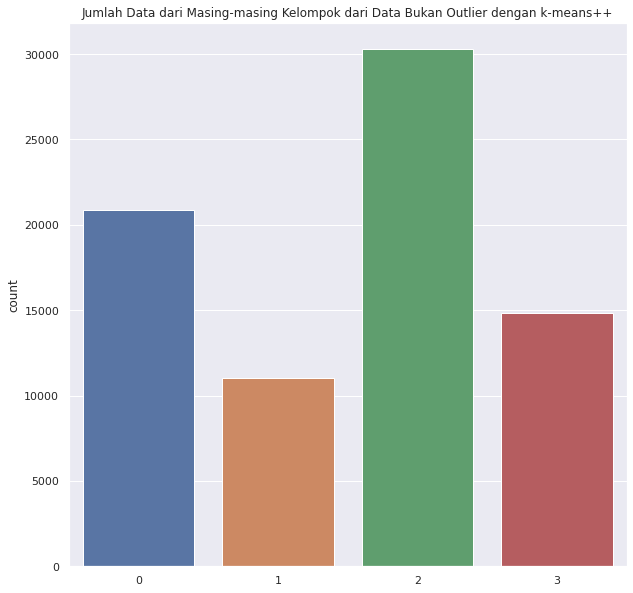

In [ ]:
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', n_jobs=-1, random_state = 99)
kmPP.fit(rfm_norm_df)
C_kmpp = kmPP.predict(rfm_norm_df)
#plot jumlah data dari masing-masing kelompok
sns.countplot(C_kmpp)
C_kmpp[:10]
plt.title('Jumlah Data dari Masing-masing Kelompok dari Data Bukan Outlier dengan k-means++') #untuk memberikan judul plot

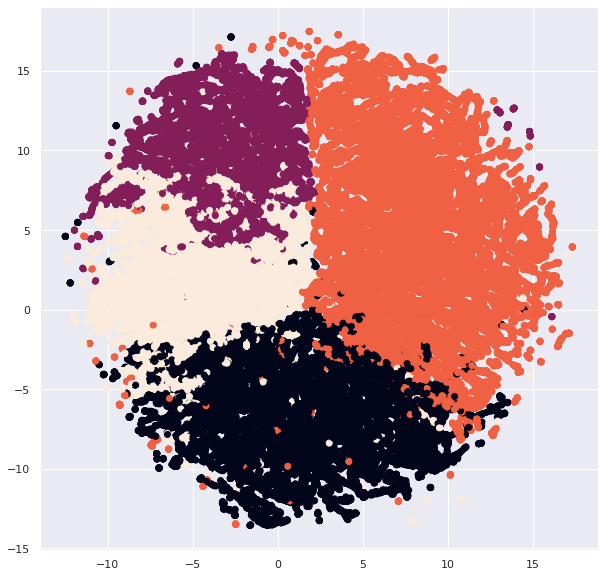

In [ ]:
#proses dimensional reduction dan plotnya untuk melihat hasil persebaran data berdasarkan kelompok
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3,random_state=99).fit_transform(rfm_norm_df)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

**Interpretasi Hasil Clustering** 

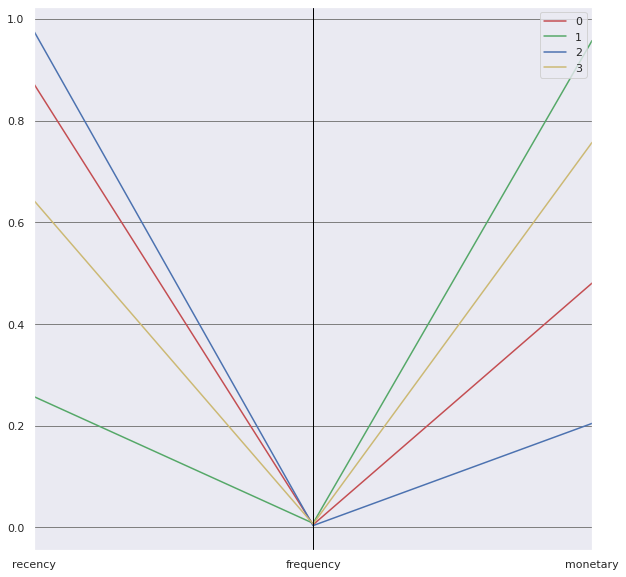

In [ ]:
cols = ['recency','frequency','monetary']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y'))
plt.grid(b=None, which='major', axis='both',color='gray')
plt.show()

Pada plot, terlihat bahwa komponen *frequency* seakan-akan dari 1 titik yang sama, maka akan dibuatkan tabel nilai dari centroid masing-masing cluster untuk setiap komponen agar dapat dilihat bahwa sebenarnya nilai *frequency* masing-masing cluster berbeda.

In [ ]:
clus = pd.DataFrame(kmPP.cluster_centers_) #akan dijadikan 'kmPP.cluster_centers_' sebagai sebuah data frame yang disimpan pada variabel 'clus'
color=['red', 'green', 'blue','yellow'] #akan ditambahkan kolom 'color' yaitu perwakilan warna dari setiap cluster
#akan ditambahkan kolom 'color' pada data 'clus'
clus.columns = cols
clus['color']=color
clus.head()

recency  frequency  monetary   color
0  0.871867   0.005141  0.480506     red
1  0.257088   0.008073  0.957567   green
2  0.975585   0.003481  0.204524    blue
3  0.642643   0.006643  0.757284  yellow

Akan dilihat nilai sebenarnya dari hasil proses normalisasi untuk komponen *recency, frequency, dan monetary*.

In [ ]:
rfm_noout['Kelas']=C_kmpp
rfm_noout.groupby('Kelas').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


recency  frequency    monetary
Kelas                                   
0      226.120253   1.041665  123.108055
1       48.312483   1.000000  174.235286
2      330.016985   1.000000   66.136083
3      143.956680   1.055447  168.277051

### Kasus 2: *Outlier*

In [ ]:
rfm_out=rfm[rfm['Outlier']==-1] #untuk mengambil data yang outlier
rfm_out.drop('Outlier',axis=1,inplace=True) #kolom 'outlier' akan di drop karena tidak akan diguakan dalam melakukan clustering
rfm_out.head() #untuk melihat 5 data teratas dari data outlier (rfm_out)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


recency  frequency  monetary
7     182.0          2    419.18
18    376.0          2    257.44
22     34.0          4    362.36
25    362.0          2    212.16
26    584.0          1     76.11

**Plot distribusi dari RFM (*recency, frequency, monetary*)**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

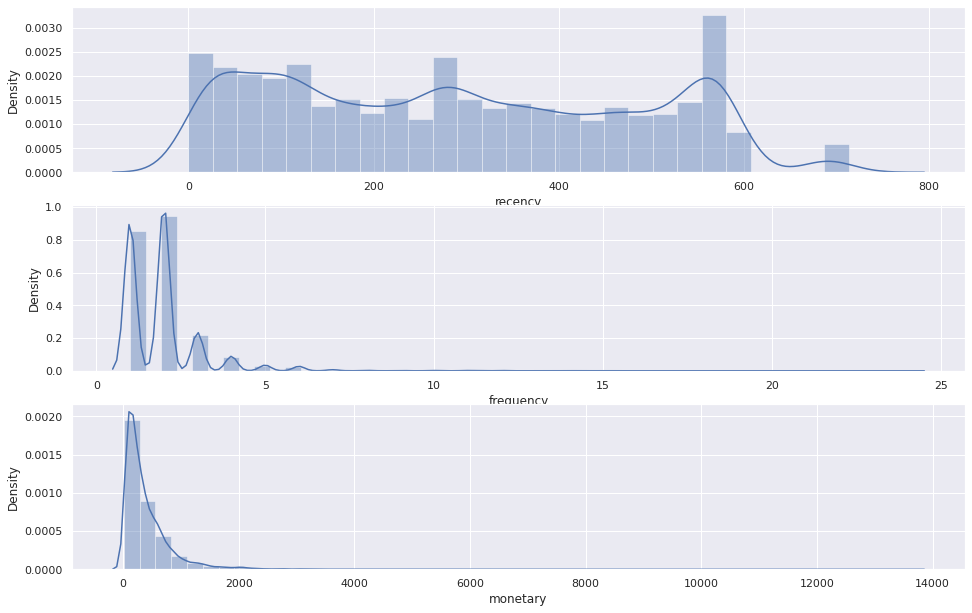

In [ ]:
# Plot distribusi dari rfm
plt.figure(figsize=(16,14)) #ukuran plot
# Plot distribusi dari recency
plt.subplot(4, 1, 1); sns.distplot(rfm_out['recency'])
# Plot distribusi dari frekuensi
plt.subplot(4, 1, 2); sns.distplot(rfm_out['frequency'])
# Plot distribusi dari monetary
plt.subplot(4, 1, 3); sns.distplot(rfm_out['monetary'])
#menampilkan plot dari recency, frequency, dan monetary
plt.show()

Selanjutnya, akan dilakukan normalisasi agar setiap variabel dapat memiliki satuan pengukuran yang sama tanpa mengubah distribusi data untuk mendapatkan interpretasi yang lebih baik.

**Proses Normalisasi**

In [ ]:
rfm_norm = preprocessing.normalize(rfm_out)
rfm_norm_df = pd.DataFrame(rfm_norm)
rfm_norm_df.describe().round(2)

0         1         2
count  16293.00  16293.00  16293.00
mean       0.59      0.01      0.67
std        0.33      0.01      0.31
min        0.00      0.00      0.03
25%        0.28      0.00      0.39
50%        0.64      0.00      0.77
75%        0.92      0.01      0.96
max        1.00      0.10      1.00

**Penentuan nilai k yang optimal dengan menggunakan *Elbow Method***

Text(0.5, 1.0, 'Elbow curve')

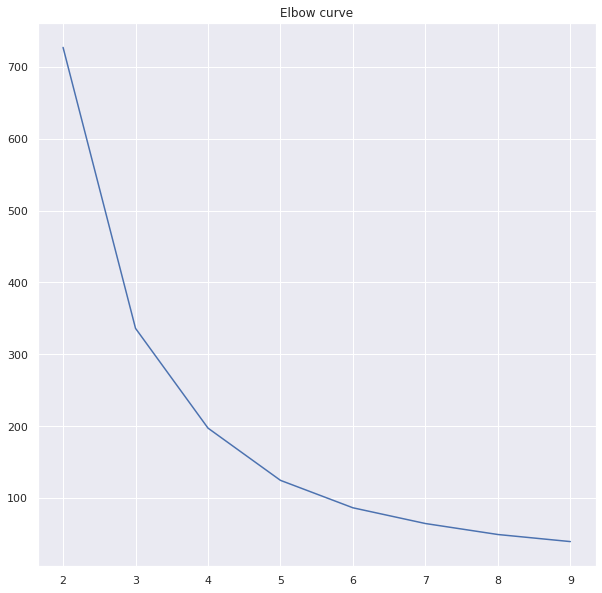

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k,init='k-means++').fit(rfm_norm_df)
    distorsions.append(kmeans.inertia_)
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Dapat dilihat, nilai k yang optimal dengan *elbow method* adalah 4 atau 5.

**Penentuan nilai k yang optimal dengan menggunakan *Silhouette Score***

For n_clusters = 2 The average silhouette_score is : 0.665923909487246
For n_clusters = 3 The average silhouette_score is : 0.6123284818538184
For n_clusters = 4 The average silhouette_score is : 0.5740794226142356
For n_clusters = 5 The average silhouette_score is : 0.5632608420036873
For n_clusters = 6 The average silhouette_score is : 0.5575062247017291
For n_clusters = 7 The average silhouette_score is : 0.5496384791371943


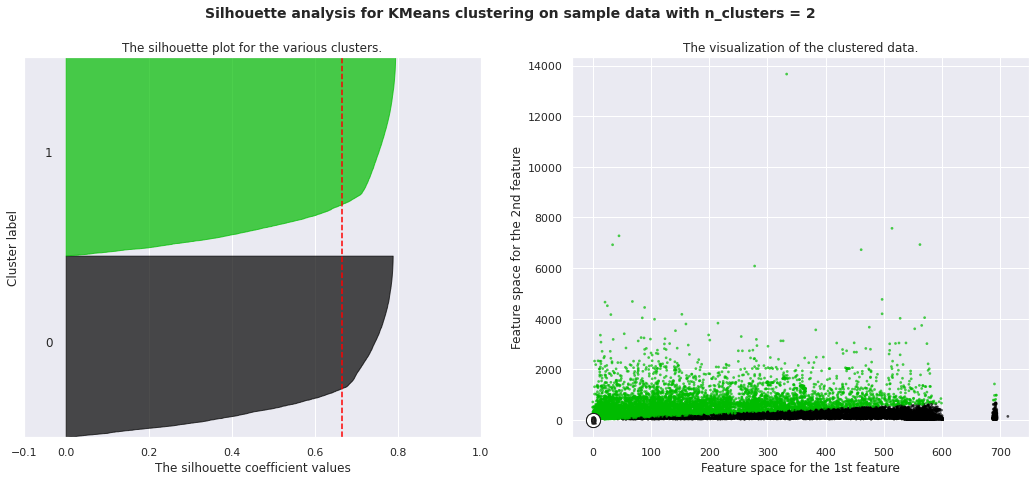

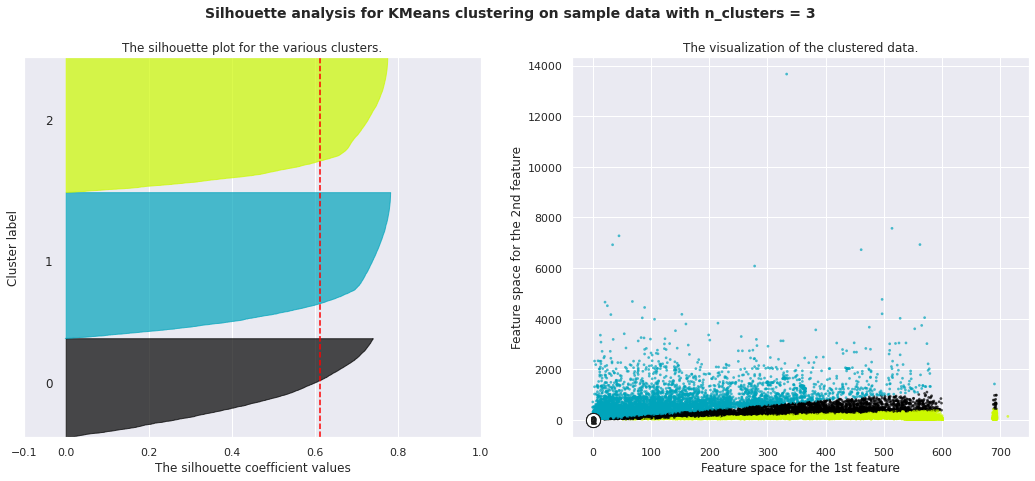

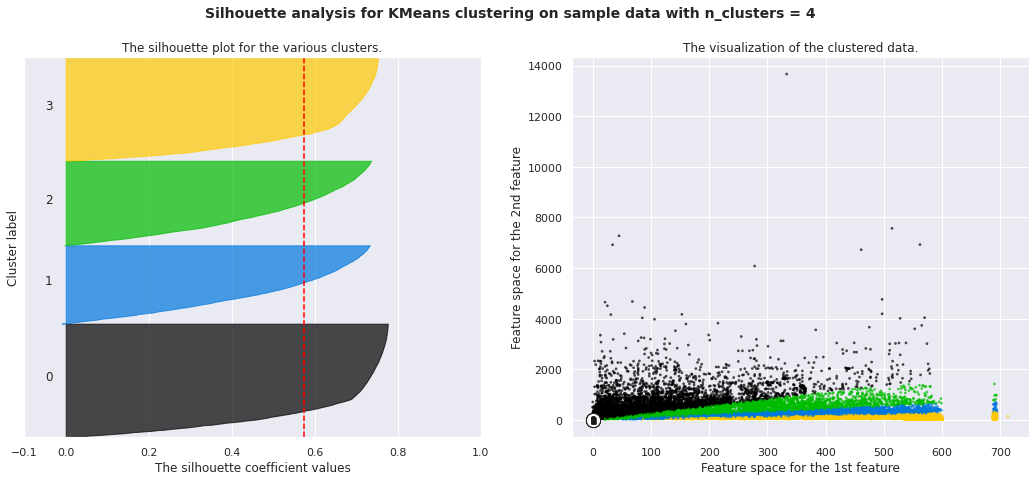

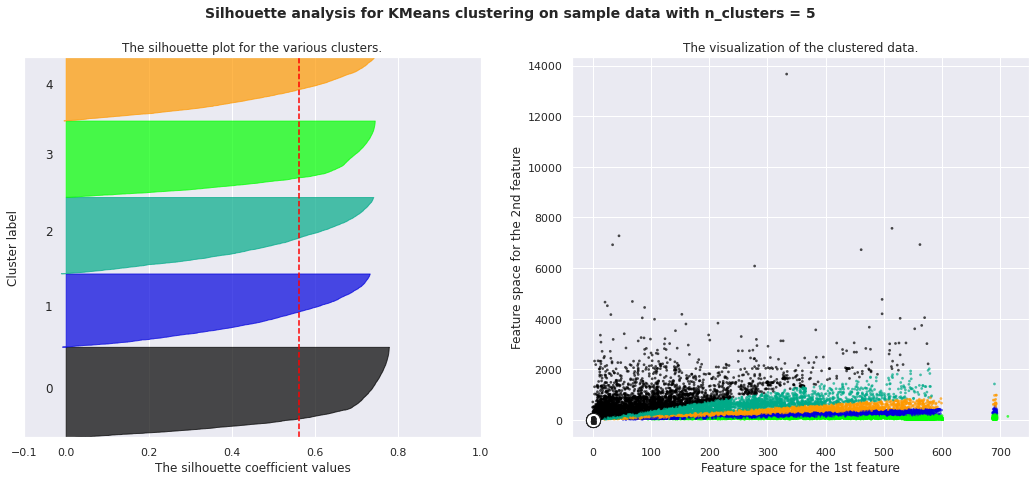

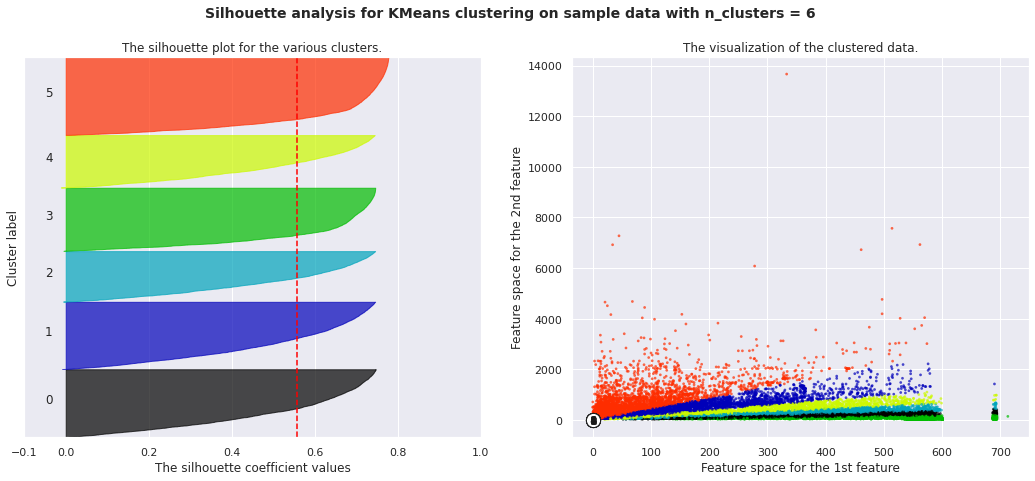

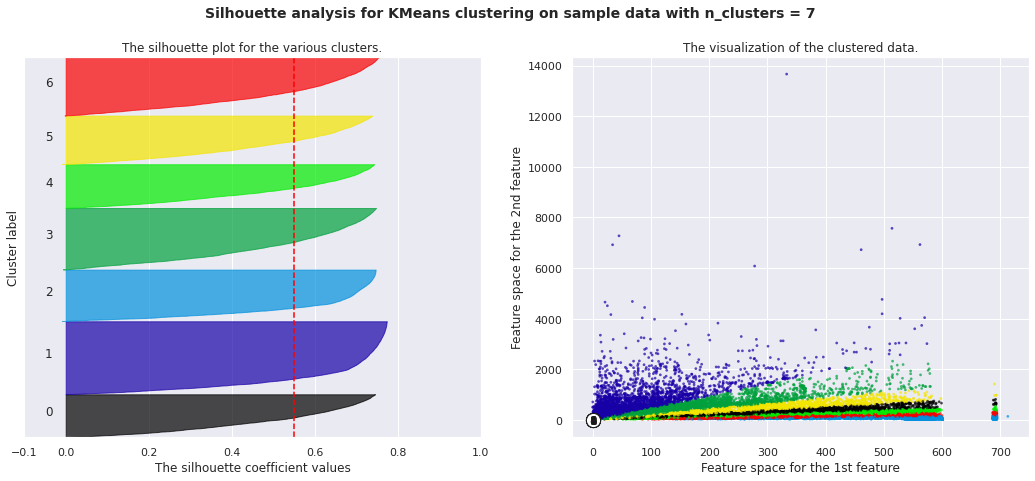

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(rfm_norm_df) + (n_clusters + 1) * 10])

    clusterer = cluster.KMeans(n_clusters=n_clusters, init='k-means++', random_state=99)
    cluster_labels = clusterer.fit_predict(rfm_norm_df)

    silhouette_avg = silhouette_score(rfm_norm_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(rfm_norm_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(rfm_out['recency'], rfm_out['monetary'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   
    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Dapat dilihat, nilai k yang optimal dengan *silhouette score* adalah 5.

**Proses clustering dengan menggunakan k-means++ (diambil nilai k=5 berdasarkan hasil analisis dengan *silhouette coefficient* dan *elbow method*)**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jumlah Data dari Masing-masing Kelompok dari Data Outlier dengan k-means++')

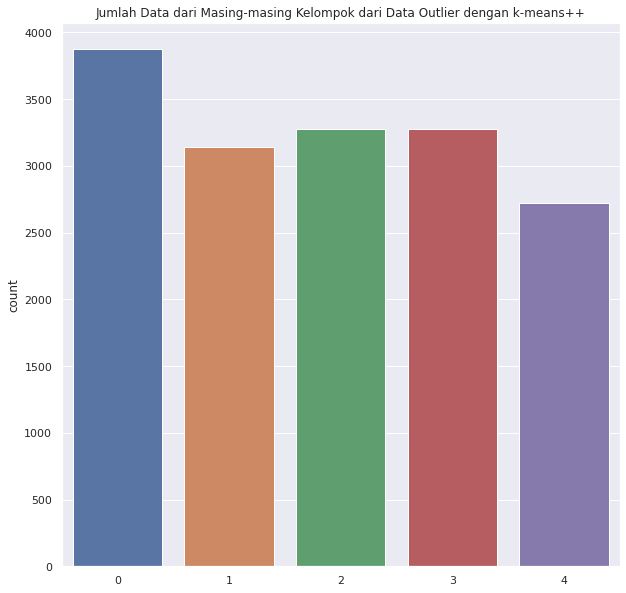

In [ ]:
k=5
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', n_jobs=-1, random_state = 99)
kmPP.fit(rfm_norm_df)
C_kmpp = kmPP.predict(rfm_norm_df)
#plot jumlah data dari masing-masing kelompok
sns.countplot(C_kmpp)
C_kmpp[:10]
plt.title('Jumlah Data dari Masing-masing Kelompok dari Data Outlier dengan k-means++') #untuk memberikan judul plot

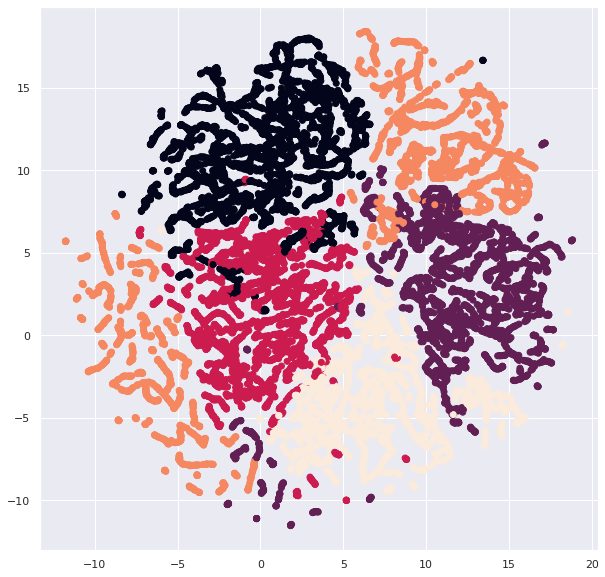

In [ ]:
#proses dimensional reduction dan plotnya untuk melihat hasil persebaran data berdasarkan kelompok
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=99).fit_transform(rfm_norm_df)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

**Interpretasi Hasil Clustering** 

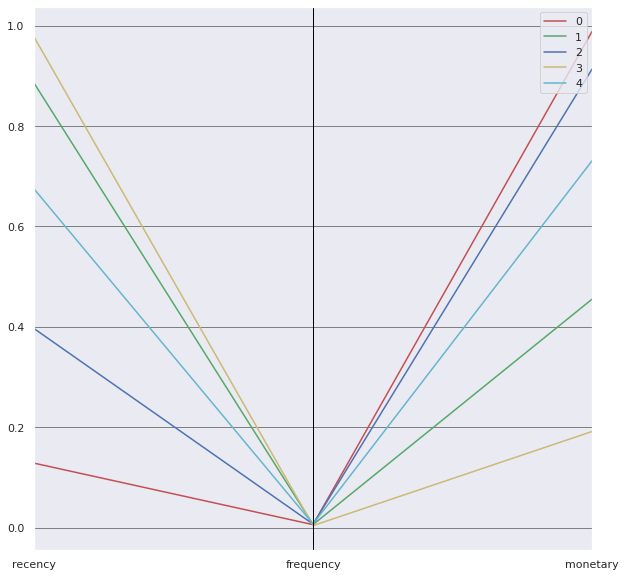

In [ ]:
cols = ['recency','frequency','monetary']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y','c'))
plt.grid(b=None, which='major', axis='both',color='gray')
plt.show()

Pada plot, terlihat bahwa komponen *frequency* seakan-akan dari 1 titik yang sama, maka akan dibuatkan tabel nilai dari centroid masing-masing cluster untuk setiap komponen agar dapat dilihat bahwa sebenarnya nilai *frequency* masing-masing cluster berbeda.

In [ ]:
clus = pd.DataFrame(kmPP.cluster_centers_) #akan dijadikan 'kmPP.cluster_centers_' sebagai sebuah data frame yang disimpan pada variabel 'clus'
color=['red', 'green', 'blue','yellow','cyan'] #akan ditambahkan kolom 'color' yaitu perwakilan warna dari setiap cluster
#akan ditambahkan kolom 'color' pada data 'clus'
clus.columns = cols
clus['color']=color 
clus.head()

recency  frequency  monetary   color
0  0.128289   0.005681  0.988860     red
1  0.885798   0.005844  0.455192   green
2  0.396476   0.006714  0.913815    blue
3  0.977709   0.003828  0.191382  yellow
4  0.674864   0.007101  0.731078    cyan

Akan dilihat nilai sebenarnya dari hasil proses normalisasi untuk komponen *recency, frequency, dan monetary*.

In [ ]:
rfm_out['Kelas']=C_kmpp
rfm_out.groupby('Kelas').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


recency  frequency    monetary
Kelas                                   
0       93.345539   1.900722  760.052922
1      391.437162   2.005727  203.830035
2      213.109008   2.028092  499.920031
3      485.964286   1.603480   90.433938
4      306.341786   2.156193  332.454256

#**Pembagian Tugas dalam Kelompok**

1. Gita Kartika Suriah, 1706031645: Mencari data, *coding* EDA (pre-processing), *coding clustering* .
2. I Putu Putra Gemilang Adi Guna, 1706031121 : Memberikan penjelasan untuk visualisasi plot,  *coding* melakukan EDA (visualisasi plot).
3. Jilan Alya, 1706026475 : Membuat presentasi, menentukan insight yang diperoleh, dan memberi rekomendasi yang perlu dilakukan client.
4. Muhammad Ilham Randi, 1706047076 : Memberikan penjelasan codingan, *coding* EDA (visualisasi plot).
5. Sheryl Nathania Salim, 1706068250: Memberikan penjelasan codingan, *coding* clustering.
6. Yoshua Yosia, 1706047334 : Mendiskusikan hipotesis, insight yang diperoleh, dan rekomendasi, mengedit video.
7. Zahra Zahira, 1706026046 : Membuat video, mendiskusikan hipotesis, insight yang diperoleh, dan rekomendasi.